#Setup

In [2]:
import pandas as pd
import numpy as np
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from google.colab import drive

In [3]:
# Montar Google Drive
drive.mount('/content/drive')

# Función para cargar todos los archivos CSV de una carpeta específica en Google Drive
def cargar_csv_desde_carpeta(carpeta_path):
    # Diccionario para almacenar los DataFrames
    dataframes = {}

    # Lista todos los archivos en la carpeta especificada
    archivos = os.listdir(carpeta_path)

    # Filtra por archivos CSV y los carga
    for archivo in archivos:
        if archivo.endswith('.csv'):
            ruta_completa = os.path.join(carpeta_path, archivo)
            df_temp = pd.read_csv(ruta_completa)

            # Utiliza el nombre del archivo como clave (sin la extensión .csv)
            clave_df = archivo[:-4]
            dataframes[clave_df] = df_temp

    return dataframes

# Ruta a la carpeta dentro de Google Drive donde tienes tus archivos CSV
ruta_completa = '/content/drive/MyDrive/MIA/2doSemestre/ML/2doGrupal_anonimo/'

# Cargar los CSVs
dfs = cargar_csv_desde_carpeta(ruta_completa)


Mounted at /content/drive


In [4]:
dfs

{'public_dataset':               0         1         2         3         4         5         6  \
 0      0.000000  0.000000  0.000000  0.116110  0.000000  0.000000  1.410743   
 1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.121866   
 2      0.000000  0.783356  0.011421  0.009993  0.000000  0.003695  1.116141   
 3      0.000000  0.068018  0.000000  0.000000  0.000000  0.000000  1.626105   
 4      0.000000  0.004424  0.000000  0.000000  0.000000  0.000000  0.827860   
 ...         ...       ...       ...       ...       ...       ...       ...   
 12874  0.004001  0.032683  0.023903  0.007486  0.000000  0.011186  0.392363   
 12875  0.002476  0.498017  0.025301  0.015679  0.001939  0.000000  0.897562   
 12876  0.003792  0.089851  0.000000  0.000000  0.000000  0.000000  1.129294   
 12877  0.000000  0.000000  0.002358  0.000000  0.000000  0.000000  1.232945   
 12878  0.000000  0.000000  0.000000  0.158777  0.000000  0.000000  1.541111   
 
          7         

In [5]:
df_mistery = dfs['public_dataset']
df_mistery

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,y
0,0.000000,0.000000,0.000000,0.116110,0.000000,0.000000,1.410743,0.0,0.000000,4.307625,...,0.043688,0.967246,0.0,2.119261,0.0,0.000000,0.191234,0.013093,0.533833,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.121866,0.0,0.000000,4.471933,...,0.000000,1.219193,0.0,1.250471,0.0,0.000000,0.000000,0.000000,0.104279,0
2,0.000000,0.783356,0.011421,0.009993,0.000000,0.003695,1.116141,0.0,0.089328,2.456649,...,0.000000,0.417612,0.0,0.660835,0.0,0.000000,0.012090,0.000000,0.508530,0
3,0.000000,0.068018,0.000000,0.000000,0.000000,0.000000,1.626105,0.0,0.000000,4.726800,...,0.000000,0.805861,0.0,1.156859,0.0,0.000000,0.068193,0.000000,0.004647,0
4,0.000000,0.004424,0.000000,0.000000,0.000000,0.000000,0.827860,0.0,0.000000,3.781346,...,0.000000,0.189144,0.0,0.444643,0.0,0.000000,0.027165,0.018768,0.022107,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12874,0.004001,0.032683,0.023903,0.007486,0.000000,0.011186,0.392363,0.0,0.024302,1.998027,...,0.000000,0.494690,0.0,0.809192,0.0,0.003177,0.000000,0.062665,0.047476,1
12875,0.002476,0.498017,0.025301,0.015679,0.001939,0.000000,0.897562,0.0,0.000000,1.202658,...,0.000000,0.091555,0.0,0.799257,0.0,0.000000,0.000000,0.011960,0.349654,1
12876,0.003792,0.089851,0.000000,0.000000,0.000000,0.000000,1.129294,0.0,0.128645,2.673270,...,0.000000,0.157594,0.0,0.522948,0.0,0.060414,0.000000,0.228885,0.024846,1
12877,0.000000,0.000000,0.002358,0.000000,0.000000,0.000000,1.232945,0.0,0.002105,4.900099,...,0.000000,0.455385,0.0,1.284606,0.0,0.000000,0.163735,0.000000,0.091074,0


In [6]:
df_mistery.describe()

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,y
count,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,...,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000
mean,0.039119,0.431078,0.025967,0.047764,0.055203,0.027065,1.239349,0.022020,0.132830,2.840675,...,0.021835,0.607870,0.015752,1.375988,0.004139,0.065088,0.065534,0.063958,0.477339,0.472009
std,0.119699,0.769985,0.064307,0.119250,0.160482,0.075832,0.622587,0.114259,0.313135,1.205472,...,0.079201,0.398621,0.071869,0.918358,0.027053,0.177476,0.169137,0.159945,0.611423,0.499235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.808467,0.000000,0.000000,1.854006,...,0.000000,0.329496,0.000000,0.694791,0.000000,0.000000,0.000000,0.000000,0.059186,0.000000
50%,0.000000,0.066283,0.000000,0.000000,0.000000,0.000000,1.163354,0.000000,0.009511,2.956206,...,0.000000,0.544363,0.000000,1.184144,0.000000,0.000000,0.005896,0.004890,0.220430,0.000000
75%,0.010875,0.443447,0.023666,0.033402,0.020665,0.011805,1.598422,0.000000,0.078249,3.850313,...,0.000000,0.799370,0.000000,1.834821,0.000000,0.027406,0.049629,0.049822,0.675197,1.000000
max,1.615933,4.458928,1.724417,2.366699,2.230590,0.972770,4.240780,2.369685,3.224023,5.371409,...,1.580180,3.484064,1.182710,5.276578,0.622340,2.196347,2.216906,2.341851,4.171445,1.000000


from matplotlib import pyplot as plt
_df_0['0'].plot(kind='hist', bins=20, title='0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['1'].plot(kind='hist', bins=20, title='1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['2'].plot(kind='hist', bins=20, title='2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['3'].plot(kind='hist', bins=20, title='3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='0', y='1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='1', y='2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='2', y='3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='3', y='4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['0'].plot(kind='line', figsize=(8, 4), title='0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['1'].plot(kind='line', figsize=(8, 4), title='1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['2'].plot(kind='line', figsize=(8, 4), title='2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['3'].plot(kind='line', figsize=(8, 4), title='3')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='0', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='1', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='2', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='3', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [5]:
df_mistery.loc[:,'y'].value_counts()

y
0    6800
1    6079
Name: count, dtype: int64

In [6]:
Y = df_mistery.loc[:,'y']
Y

0        0
1        0
2        0
3        0
4        0
        ..
12874    1
12875    1
12876    1
12877    0
12878    1
Name: y, Length: 12879, dtype: int64

In [7]:
print(df_mistery.shape)

(12879, 1281)


In [8]:
df_mistery = df_mistery.drop('y', axis=1)
df_mistery

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0.000000,0.000000,0.000000,0.116110,0.000000,0.000000,1.410743,0.0,0.000000,4.307625,...,3.974645,0.043688,0.967246,0.0,2.119261,0.0,0.000000,0.191234,0.013093,0.533833
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.121866,0.0,0.000000,4.471933,...,3.336296,0.000000,1.219193,0.0,1.250471,0.0,0.000000,0.000000,0.000000,0.104279
2,0.000000,0.783356,0.011421,0.009993,0.000000,0.003695,1.116141,0.0,0.089328,2.456649,...,1.153863,0.000000,0.417612,0.0,0.660835,0.0,0.000000,0.012090,0.000000,0.508530
3,0.000000,0.068018,0.000000,0.000000,0.000000,0.000000,1.626105,0.0,0.000000,4.726800,...,2.454306,0.000000,0.805861,0.0,1.156859,0.0,0.000000,0.068193,0.000000,0.004647
4,0.000000,0.004424,0.000000,0.000000,0.000000,0.000000,0.827860,0.0,0.000000,3.781346,...,3.511414,0.000000,0.189144,0.0,0.444643,0.0,0.000000,0.027165,0.018768,0.022107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12874,0.004001,0.032683,0.023903,0.007486,0.000000,0.011186,0.392363,0.0,0.024302,1.998027,...,3.456442,0.000000,0.494690,0.0,0.809192,0.0,0.003177,0.000000,0.062665,0.047476
12875,0.002476,0.498017,0.025301,0.015679,0.001939,0.000000,0.897562,0.0,0.000000,1.202658,...,1.514071,0.000000,0.091555,0.0,0.799257,0.0,0.000000,0.000000,0.011960,0.349654
12876,0.003792,0.089851,0.000000,0.000000,0.000000,0.000000,1.129294,0.0,0.128645,2.673270,...,2.333598,0.000000,0.157594,0.0,0.522948,0.0,0.060414,0.000000,0.228885,0.024846
12877,0.000000,0.000000,0.002358,0.000000,0.000000,0.000000,1.232945,0.0,0.002105,4.900099,...,2.455305,0.000000,0.455385,0.0,1.284606,0.0,0.000000,0.163735,0.000000,0.091074


In [9]:
df_quiz = dfs['quiz']
df_quiz

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0.00000,0.000000,0.000118,0.005143,0.000000,0.000000,1.636060,0.000000,0.003938,4.879917,...,2.775311,0.000000,0.818265,0.0,1.672872,0.0,0.000000,0.017193,0.000000,0.210591
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.804756,0.000000,0.000000,4.127502,...,3.868608,0.000000,0.874581,0.0,1.947029,0.0,0.000000,0.028596,0.001032,0.136174
2,0.00000,0.119754,0.005464,0.000000,0.016717,0.000000,0.847004,0.000000,0.019138,2.091226,...,2.689605,0.000000,0.775467,0.0,0.448414,0.0,0.000532,0.000000,0.188395,0.149841
3,0.00000,0.080867,0.000000,0.000000,0.000000,0.000000,0.122931,0.000000,0.112418,1.414209,...,3.624249,0.000000,0.201905,0.0,0.474740,0.0,0.007646,0.000000,0.040450,0.006031
4,0.03254,0.000000,0.000000,0.000000,0.000000,0.000000,0.521970,0.000000,0.057614,3.493206,...,4.408341,0.077237,0.851636,0.0,1.073226,0.0,0.000000,0.070083,0.091158,0.483534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.45853,1.612664,0.004079,0.031988,0.000000,0.003716,2.595684,0.068074,0.404651,2.184495,...,1.536850,0.000000,1.370424,0.0,2.695897,0.0,0.703828,0.047448,0.516193,0.140731
995,0.00000,2.055538,0.000000,0.115399,0.070135,0.070976,1.423814,0.000000,0.156946,1.072709,...,0.725283,0.000000,0.800073,0.0,2.497116,0.0,0.004120,0.000000,0.031955,1.547075
996,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990916,0.000000,0.000000,4.486151,...,3.125550,0.000000,0.346267,0.0,0.529066,0.0,0.000000,0.009286,0.000000,0.247800
997,0.00000,0.000000,0.000000,0.024478,0.001524,0.000000,1.064969,0.000000,0.000000,3.876287,...,3.986474,0.004339,0.974917,0.0,1.286053,0.0,0.011129,0.000000,0.000000,0.342333


In [9]:
df_mistery_train, df_mistery_val_test, Y_train, Y_val_test = train_test_split(df_mistery, Y, test_size=0.20, random_state=42)
df_mistery_val, df_mistery_test, Y_val, Y_test = train_test_split(df_mistery_val_test, Y_val_test, test_size=0.5, random_state=42)

# Random Search

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

def entrenar_modelo(X_train, Y_train, X_val, Y_val, arquitectura, batch_size, optimizer_info, loss, metrics, epochs, callbacks):
    model = Sequential()
    model.add(Dense(arquitectura[0][0], activation=arquitectura[0][1], input_shape=(X_train.shape[1],)))
    for num_neuronas, activacion in arquitectura[1:]:
        model.add(Dense(num_neuronas, activation=activacion))
    model.add(Dense(1, activation='sigmoid'))

    # Configurar el optimizador basado en el nombre y los parámetros dados
    optimizer_name = optimizer_info['name']
    if optimizer_name == 'adam':
        optimizer = Adam(
            learning_rate=optimizer_info.get('learning_rate', 0.001),
            beta_1=optimizer_info.get('beta_1', 0.9),
            beta_2=optimizer_info.get('beta_2', 0.999))
    elif optimizer_name == 'sgd':
        optimizer = SGD(
            learning_rate=optimizer_info.get('learning_rate', 0.01),
            momentum=optimizer_info.get('momentum', 0.0))
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(
            learning_rate=optimizer_info.get('learning_rate', 0.001),
            rho=optimizer_info.get('rho', 0.9))

    # Configura el ModelCheckpoint para guardar sólo el mejor modelo según 'val_loss'
    # checkpoint_callback = ModelCheckpoint('/content/drive/MyDrive/MIA/2doSemestre/ML/2doGrupal_anonimo/best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

    # model compile
    model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

    # train
    history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, callbacks=callbacks)

    return model, history



In [15]:
def entrenar_y_registrar_resultados(X_train, Y_train, X_val, Y_val, configuraciones):
    resultados = []

    for config_index, config in enumerate(configuraciones, start=1):
        arquitectura, batch_size, optimizer_info, loss, metrics, epochs, callbacks = config

        # Asegura el uso de .get() para acceder a 'beta_1' y 'beta_2', proporcionando un valor predeterminado si no existen
        optimizer_name = optimizer_info['name']
        learning_rate = optimizer_info.get('learning_rate', 'N/A')  # Usa 'N/A' como predeterminado si no se especifica
        beta_1 = optimizer_info.get('beta_1', 'N/A')  # Usa 'N/A' como predeterminado para 'beta_1'
        beta_2 = optimizer_info.get('beta_2', 'N/A')  # Usa 'N/A' como predeterminado para 'beta_2'
        momentum = optimizer_info.get('momentum', 'N/A')  # Para SGD
        rho = optimizer_info.get('rho', 'N/A')  # Para RMSprop

        model, history = entrenar_modelo(X_train, Y_train, X_val, Y_val, arquitectura, batch_size, optimizer_info, loss, metrics, epochs, callbacks)

        # Extraer las métricas de la última época registrada
        loss = history.history['loss'][-1]
        accuracy = history.history['accuracy'][-1]
        val_loss = history.history['val_loss'][-1]
        val_accuracy = history.history['val_accuracy'][-1]

        resultados.append({
            'Config Index': config_index,
            'Arquitectura': str(arquitectura),
            'Batch Size': batch_size,
            'Optimizer': optimizer_name,
            'Learning Rate': learning_rate,
            'Beta 1': beta_1,
            'Beta 2': beta_2,
            'Momentum': momentum,
            'Rho': rho,
            'Loss': loss,
            'Accuracy': accuracy,
            'Val Loss': val_loss,
            'Val Accuracy': val_accuracy,
            'Epochs': epochs,
            'Callbacks': ', '.join([type(cb).__name__ for cb in callbacks]),
        })

        # Generar y mostrar gráficos para cada configuración
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'], 'b', label='Training Loss')
        plt.plot(history.history['val_loss'], 'g', label='Validation Loss')
        plt.title(f'Training and Validation Loss for Configuration #{config_index}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    # Convertir los resultados a un DataFrame y guardarlo en un archivo Excel
    df_resultados = pd.DataFrame(resultados)
    df_resultados.to_excel('resultados_entrenamiento.xlsx', index=False)

    return df_resultados,model,history


Epoch 1/100
322/322 [==============================] - 2s 3ms/step - loss: 0.4436 - accuracy: 0.7834 - val_loss: 0.3968 - val_accuracy: 0.7966
Epoch 2/100
 46/322 [===>..........................] - ETA: 0s - loss: 0.4232 - accuracy: 0.7976

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


322/322 [==============================] - 1s 2ms/step - loss: 0.3868 - accuracy: 0.8167 - val_loss: 0.3707 - val_accuracy: 0.8269
Epoch 3/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3657 - accuracy: 0.8307 - val_loss: 0.4071 - val_accuracy: 0.8082
Epoch 4/100
322/322 [==============================] - 1s 4ms/step - loss: 0.3561 - accuracy: 0.8331 - val_loss: 0.3630 - val_accuracy: 0.8276
Epoch 5/100
322/322 [==============================] - 2s 7ms/step - loss: 0.3454 - accuracy: 0.8407 - val_loss: 0.3629 - val_accuracy: 0.8323
Epoch 6/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8453 - val_loss: 0.4112 - val_accuracy: 0.7997
Epoch 7/100
322/322 [==============================] - 1s 4ms/step - loss: 0.3344 - accuracy: 0.8431 - val_loss: 0.3561 - val_accuracy: 0.8339
Epoch 8/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3316 - accuracy: 0.8470 - val_loss: 0.3462 - val_accuracy: 0.8362
Epoch 9/100

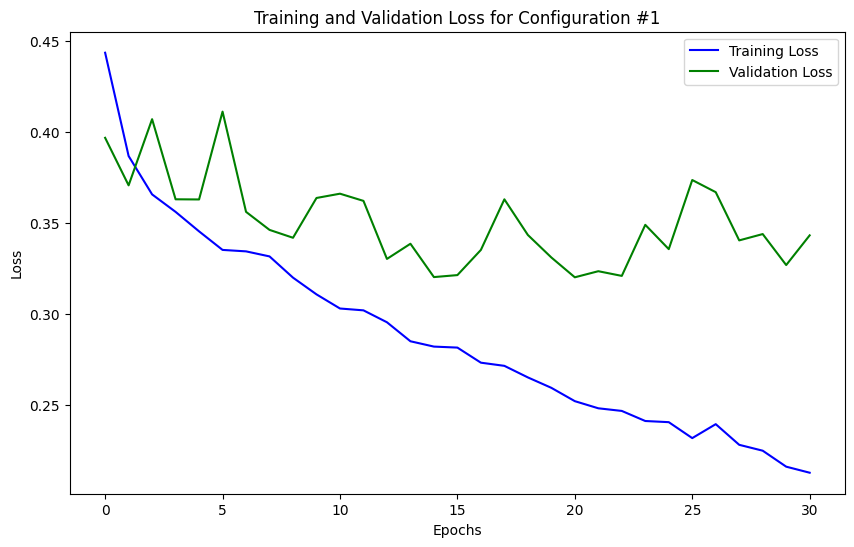

Epoch 1/100
322/322 [==============================] - 2s 3ms/step - loss: 0.4684 - accuracy: 0.7678 - val_loss: 0.4116 - val_accuracy: 0.8005
Epoch 2/100
 79/322 [======>.......................] - ETA: 0s - loss: 0.4187 - accuracy: 0.7927

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


322/322 [==============================] - 1s 2ms/step - loss: 0.4223 - accuracy: 0.7958 - val_loss: 0.3890 - val_accuracy: 0.8051
Epoch 3/100
322/322 [==============================] - 1s 3ms/step - loss: 0.4127 - accuracy: 0.8009 - val_loss: 0.4028 - val_accuracy: 0.7919
Epoch 4/100
322/322 [==============================] - 1s 3ms/step - loss: 0.4035 - accuracy: 0.8076 - val_loss: 0.3808 - val_accuracy: 0.8152
Epoch 5/100
322/322 [==============================] - 1s 2ms/step - loss: 0.3931 - accuracy: 0.8113 - val_loss: 0.4615 - val_accuracy: 0.7648
Epoch 6/100
322/322 [==============================] - 1s 2ms/step - loss: 0.3857 - accuracy: 0.8175 - val_loss: 0.3826 - val_accuracy: 0.8207
Epoch 7/100
322/322 [==============================] - 1s 2ms/step - loss: 0.3895 - accuracy: 0.8098 - val_loss: 0.3742 - val_accuracy: 0.8090
Epoch 8/100
322/322 [==============================] - 1s 2ms/step - loss: 0.3754 - accuracy: 0.8222 - val_loss: 0.3763 - val_accuracy: 0.8175
Epoch 9/100

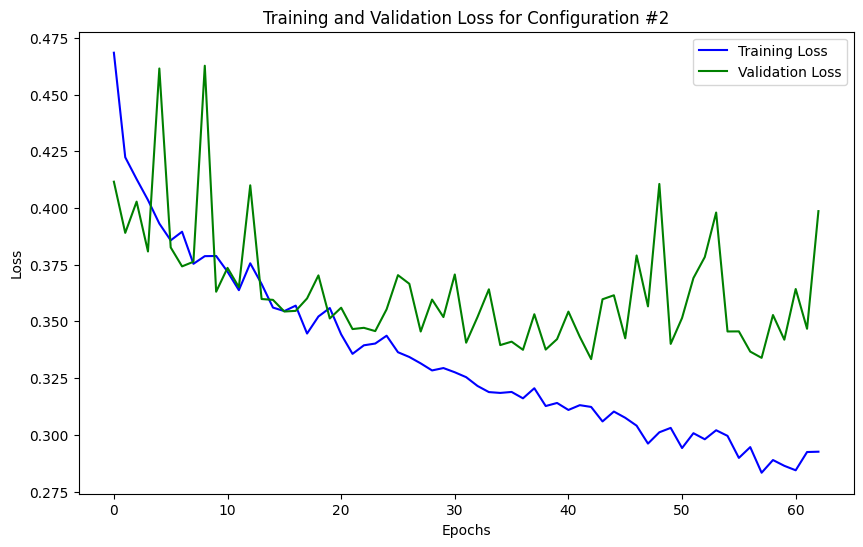

Epoch 1/100
322/322 [==============================] - 2s 3ms/step - loss: 0.4460 - accuracy: 0.7796 - val_loss: 0.4032 - val_accuracy: 0.7997
Epoch 2/100
 64/322 [====>.........................] - ETA: 0s - loss: 0.4242 - accuracy: 0.8013

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


322/322 [==============================] - 1s 3ms/step - loss: 0.3999 - accuracy: 0.8102 - val_loss: 0.3687 - val_accuracy: 0.8222
Epoch 3/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3815 - accuracy: 0.8179 - val_loss: 0.3713 - val_accuracy: 0.8230
Epoch 4/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3738 - accuracy: 0.8195 - val_loss: 0.3686 - val_accuracy: 0.8315
Epoch 5/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3667 - accuracy: 0.8297 - val_loss: 0.3611 - val_accuracy: 0.8284
Epoch 6/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3550 - accuracy: 0.8366 - val_loss: 0.3572 - val_accuracy: 0.8377
Epoch 7/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3502 - accuracy: 0.8387 - val_loss: 0.3774 - val_accuracy: 0.8315
Epoch 8/100
322/322 [==============================] - 1s 4ms/step - loss: 0.3424 - accuracy: 0.8423 - val_loss: 0.3672 - val_accuracy: 0.8408
Epoch 9/100

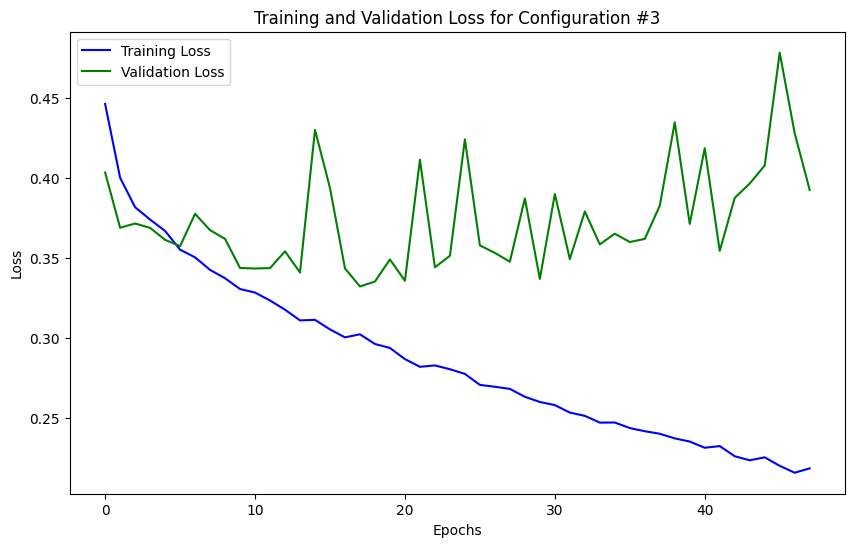

Epoch 1/100
322/322 [==============================] - 2s 3ms/step - loss: 0.4472 - accuracy: 0.7797 - val_loss: 0.3922 - val_accuracy: 0.8005
Epoch 2/100
 72/322 [=====>........................] - ETA: 0s - loss: 0.3965 - accuracy: 0.8077

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


322/322 [==============================] - 1s 3ms/step - loss: 0.3931 - accuracy: 0.8139 - val_loss: 0.3712 - val_accuracy: 0.8106
Epoch 3/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3678 - accuracy: 0.8268 - val_loss: 0.3678 - val_accuracy: 0.8168
Epoch 4/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3599 - accuracy: 0.8291 - val_loss: 0.3934 - val_accuracy: 0.8183
Epoch 5/100
322/322 [==============================] - 1s 4ms/step - loss: 0.3505 - accuracy: 0.8381 - val_loss: 0.3556 - val_accuracy: 0.8292
Epoch 6/100
322/322 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.8439 - val_loss: 0.3838 - val_accuracy: 0.8276
Epoch 7/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3369 - accuracy: 0.8482 - val_loss: 0.3616 - val_accuracy: 0.8222
Epoch 8/100
322/322 [==============================] - 2s 6ms/step - loss: 0.3287 - accuracy: 0.8508 - val_loss: 0.3458 - val_accuracy: 0.8331
Epoch 9/100

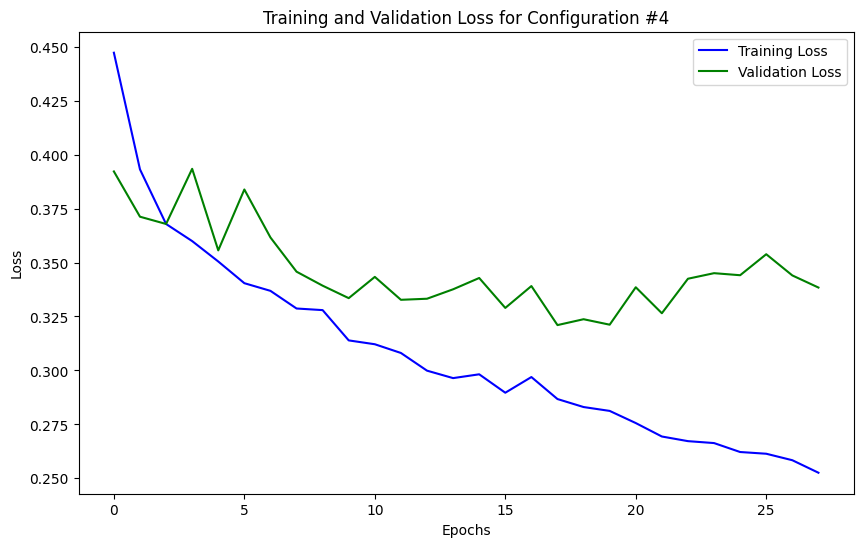

Epoch 1/50
161/161 [==============================] - 2s 5ms/step - loss: 0.4481 - accuracy: 0.7796 - val_loss: 0.4106 - val_accuracy: 0.8012
Epoch 2/50
161/161 [==============================] - 1s 5ms/step - loss: 0.3938 - accuracy: 0.8128 - val_loss: 0.3955 - val_accuracy: 0.8028
Epoch 3/50
161/161 [==============================] - 1s 4ms/step - loss: 0.3794 - accuracy: 0.8211 - val_loss: 0.3864 - val_accuracy: 0.8175
Epoch 4/50
161/161 [==============================] - 1s 4ms/step - loss: 0.3639 - accuracy: 0.8308 - val_loss: 0.3780 - val_accuracy: 0.8207
Epoch 5/50
161/161 [==============================] - 1s 6ms/step - loss: 0.3504 - accuracy: 0.8382 - val_loss: 0.3876 - val_accuracy: 0.8191
Epoch 6/50
161/161 [==============================] - 1s 3ms/step - loss: 0.3485 - accuracy: 0.8391 - val_loss: 0.3561 - val_accuracy: 0.8377
Epoch 7/50
161/161 [==============================] - 1s 4ms/step - loss: 0.3370 - accuracy: 0.8431 - val_loss: 0.3563 - val_accuracy: 0.8416
Epoch 

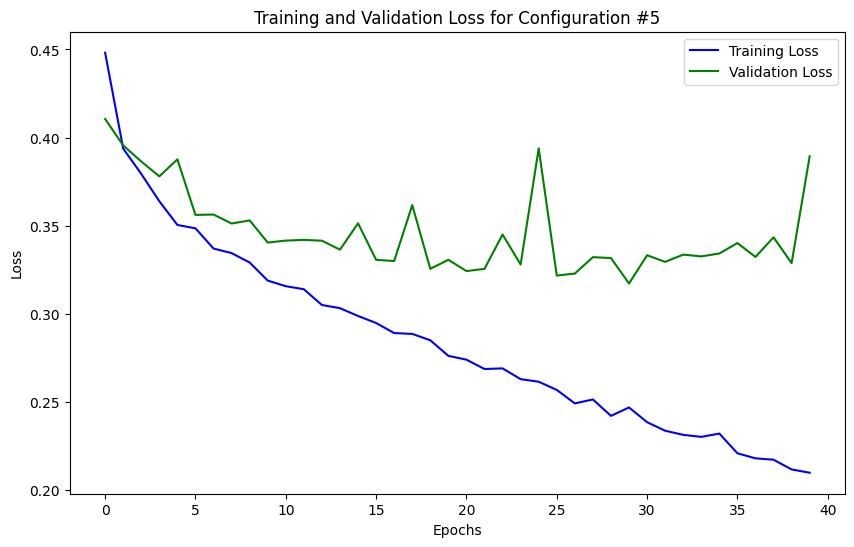

Epoch 1/150
322/322 [==============================] - 2s 5ms/step - loss: 0.4296 - accuracy: 0.7960 - val_loss: 0.3786 - val_accuracy: 0.8152
Epoch 2/150
322/322 [==============================] - 2s 6ms/step - loss: 0.3869 - accuracy: 0.8140 - val_loss: 0.3735 - val_accuracy: 0.8222
Epoch 3/150
322/322 [==============================] - 1s 4ms/step - loss: 0.3628 - accuracy: 0.8320 - val_loss: 0.3650 - val_accuracy: 0.8199
Epoch 4/150
322/322 [==============================] - 1s 4ms/step - loss: 0.3585 - accuracy: 0.8333 - val_loss: 0.4696 - val_accuracy: 0.7772
Epoch 5/150
322/322 [==============================] - 2s 8ms/step - loss: 0.3505 - accuracy: 0.8382 - val_loss: 0.3884 - val_accuracy: 0.7943
Epoch 6/150
322/322 [==============================] - 2s 5ms/step - loss: 0.3343 - accuracy: 0.8487 - val_loss: 0.3613 - val_accuracy: 0.8408
Epoch 7/150
322/322 [==============================] - 1s 4ms/step - loss: 0.3289 - accuracy: 0.8477 - val_loss: 0.3501 - val_accuracy: 0.8269

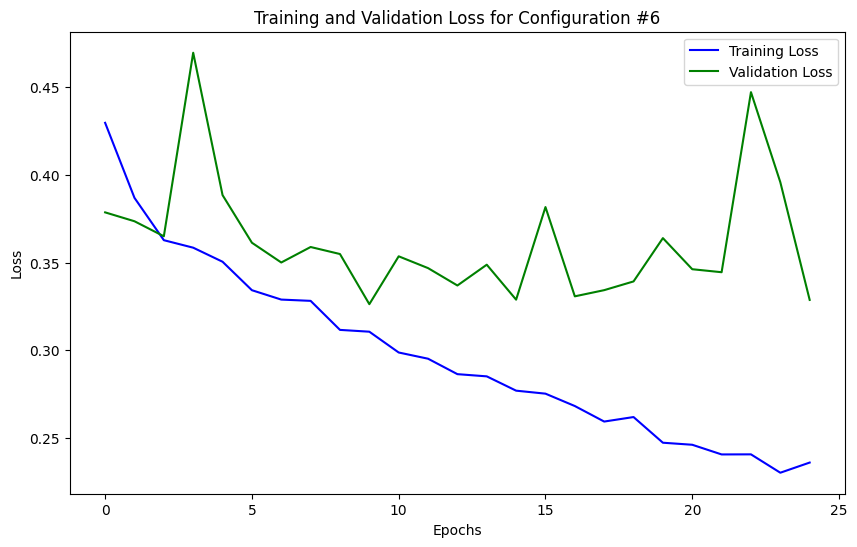

Epoch 1/100
322/322 [==============================] - 2s 3ms/step - loss: 0.4685 - accuracy: 0.7683 - val_loss: 0.4063 - val_accuracy: 0.7958
Epoch 2/100
 58/322 [====>.........................] - ETA: 0s - loss: 0.4260 - accuracy: 0.8093

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


322/322 [==============================] - 1s 3ms/step - loss: 0.4228 - accuracy: 0.7956 - val_loss: 0.4290 - val_accuracy: 0.7748
Epoch 3/100
322/322 [==============================] - 1s 3ms/step - loss: 0.4110 - accuracy: 0.8023 - val_loss: 0.4026 - val_accuracy: 0.7896
Epoch 4/100
322/322 [==============================] - 1s 3ms/step - loss: 0.4006 - accuracy: 0.8053 - val_loss: 0.3928 - val_accuracy: 0.8121
Epoch 5/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3879 - accuracy: 0.8156 - val_loss: 0.3777 - val_accuracy: 0.8144
Epoch 6/100
322/322 [==============================] - 1s 4ms/step - loss: 0.3825 - accuracy: 0.8184 - val_loss: 0.4008 - val_accuracy: 0.8222
Epoch 7/100
322/322 [==============================] - 2s 6ms/step - loss: 0.3732 - accuracy: 0.8253 - val_loss: 0.3670 - val_accuracy: 0.8269
Epoch 8/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3789 - accuracy: 0.8232 - val_loss: 0.3652 - val_accuracy: 0.8261
Epoch 9/100

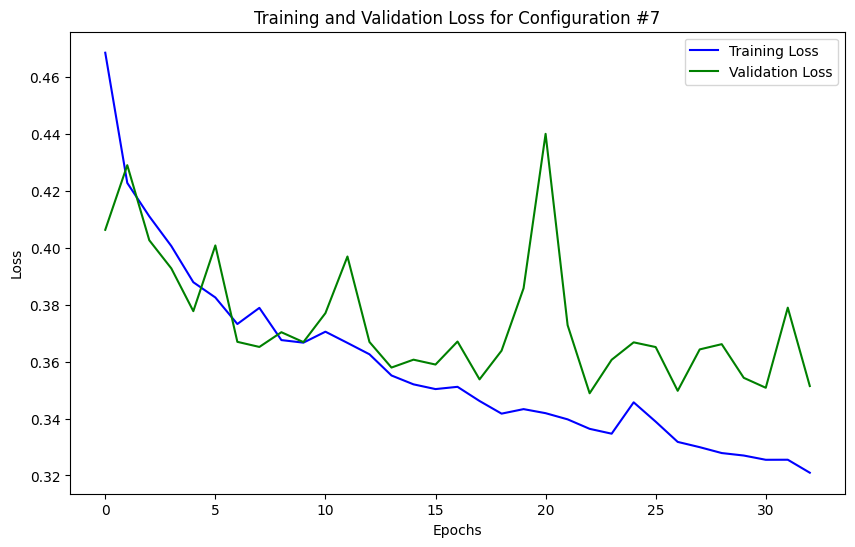

Epoch 1/120
644/644 [==============================] - 3s 3ms/step - loss: 0.4610 - accuracy: 0.7723 - val_loss: 0.4108 - val_accuracy: 0.8036
Epoch 2/120
644/644 [==============================] - 2s 3ms/step - loss: 0.4260 - accuracy: 0.7926 - val_loss: 0.4039 - val_accuracy: 0.8012
Epoch 3/120
644/644 [==============================] - 3s 5ms/step - loss: 0.4083 - accuracy: 0.8009 - val_loss: 0.3940 - val_accuracy: 0.8152
Epoch 4/120
644/644 [==============================] - 2s 3ms/step - loss: 0.3955 - accuracy: 0.8092 - val_loss: 0.4070 - val_accuracy: 0.7950
Epoch 5/120
644/644 [==============================] - 2s 4ms/step - loss: 0.3931 - accuracy: 0.8127 - val_loss: 0.3768 - val_accuracy: 0.8245
Epoch 6/120
644/644 [==============================] - 2s 2ms/step - loss: 0.3839 - accuracy: 0.8171 - val_loss: 0.4549 - val_accuracy: 0.7873
Epoch 7/120
644/644 [==============================] - 2s 4ms/step - loss: 0.3800 - accuracy: 0.8222 - val_loss: 0.3919 - val_accuracy: 0.8214

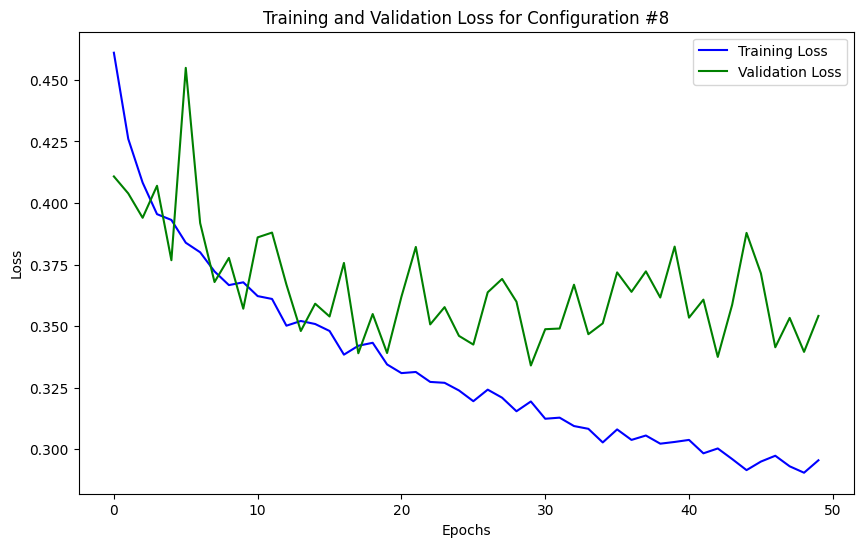

Epoch 1/100
322/322 [==============================] - 4s 8ms/step - loss: 0.4543 - accuracy: 0.7792 - val_loss: 0.4019 - val_accuracy: 0.8036
Epoch 2/100
 19/322 [>.............................] - ETA: 1s - loss: 0.4144 - accuracy: 0.7961

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


322/322 [==============================] - 1s 4ms/step - loss: 0.3997 - accuracy: 0.8100 - val_loss: 0.3775 - val_accuracy: 0.8137
Epoch 3/100
322/322 [==============================] - 2s 5ms/step - loss: 0.3864 - accuracy: 0.8159 - val_loss: 0.3709 - val_accuracy: 0.8137
Epoch 4/100
322/322 [==============================] - 1s 4ms/step - loss: 0.3752 - accuracy: 0.8208 - val_loss: 0.3758 - val_accuracy: 0.8214
Epoch 5/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3673 - accuracy: 0.8274 - val_loss: 0.3685 - val_accuracy: 0.8276
Epoch 6/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8300 - val_loss: 0.3838 - val_accuracy: 0.8276
Epoch 7/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3570 - accuracy: 0.8314 - val_loss: 0.3605 - val_accuracy: 0.8253
Epoch 8/100
322/322 [==============================] - 1s 5ms/step - loss: 0.3517 - accuracy: 0.8374 - val_loss: 0.3740 - val_accuracy: 0.8129
Epoch 9/100

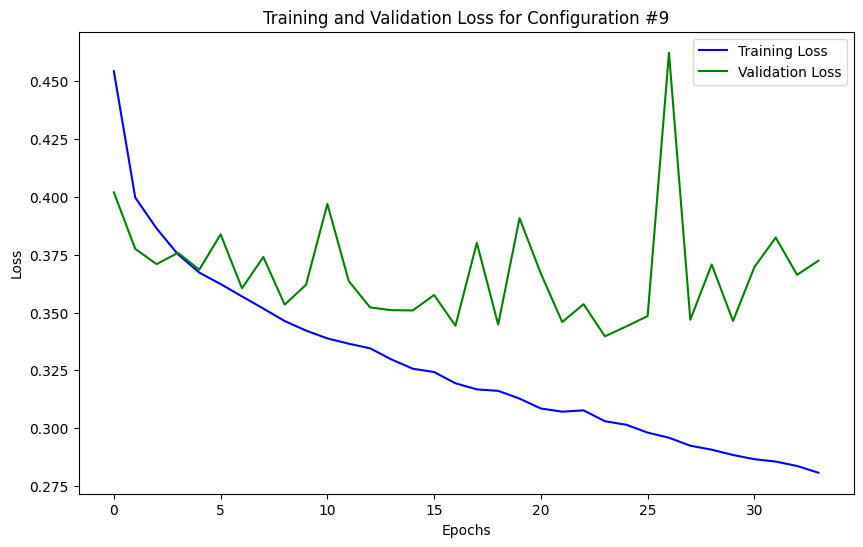

Epoch 1/200
161/161 [==============================] - 3s 11ms/step - loss: 0.4779 - accuracy: 0.7725 - val_loss: 0.4446 - val_accuracy: 0.7756
Epoch 2/200
161/161 [==============================] - 1s 8ms/step - loss: 0.4297 - accuracy: 0.7917 - val_loss: 0.4145 - val_accuracy: 0.7974
Epoch 3/200
161/161 [==============================] - 1s 7ms/step - loss: 0.4139 - accuracy: 0.8019 - val_loss: 0.4238 - val_accuracy: 0.7826
Epoch 4/200
161/161 [==============================] - 1s 7ms/step - loss: 0.4034 - accuracy: 0.8081 - val_loss: 0.3950 - val_accuracy: 0.8043
Epoch 5/200
161/161 [==============================] - 1s 5ms/step - loss: 0.3955 - accuracy: 0.8085 - val_loss: 0.3926 - val_accuracy: 0.8012
Epoch 6/200
161/161 [==============================] - 1s 6ms/step - loss: 0.3890 - accuracy: 0.8149 - val_loss: 0.3824 - val_accuracy: 0.8121
Epoch 7/200
161/161 [==============================] - 1s 7ms/step - loss: 0.3830 - accuracy: 0.8185 - val_loss: 0.3776 - val_accuracy: 0.814

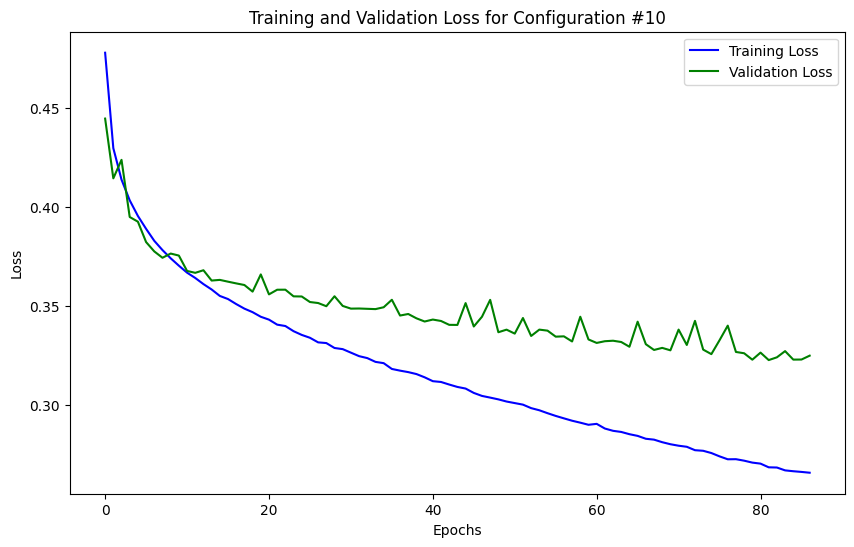

Epoch 1/150
81/81 [==============================] - 2s 15ms/step - loss: 0.5039 - accuracy: 0.7504 - val_loss: 0.4500 - val_accuracy: 0.7795
Epoch 2/150
13/81 [===>..........................] - ETA: 0s - loss: 0.4622 - accuracy: 0.7722

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


81/81 [==============================] - 1s 10ms/step - loss: 0.4347 - accuracy: 0.7876 - val_loss: 0.4147 - val_accuracy: 0.7904
Epoch 3/150
81/81 [==============================] - 1s 10ms/step - loss: 0.4126 - accuracy: 0.8021 - val_loss: 0.3986 - val_accuracy: 0.8059
Epoch 4/150
81/81 [==============================] - 1s 10ms/step - loss: 0.3995 - accuracy: 0.8062 - val_loss: 0.3873 - val_accuracy: 0.8090
Epoch 5/150
81/81 [==============================] - 1s 10ms/step - loss: 0.3852 - accuracy: 0.8180 - val_loss: 0.3885 - val_accuracy: 0.8043
Epoch 6/150
81/81 [==============================] - 1s 11ms/step - loss: 0.3806 - accuracy: 0.8232 - val_loss: 0.3762 - val_accuracy: 0.8152
Epoch 7/150
81/81 [==============================] - 1s 12ms/step - loss: 0.3699 - accuracy: 0.8271 - val_loss: 0.3672 - val_accuracy: 0.8222
Epoch 8/150
81/81 [==============================] - 1s 15ms/step - loss: 0.3610 - accuracy: 0.8300 - val_loss: 0.3609 - val_accuracy: 0.8253
Epoch 9/150
81/81 

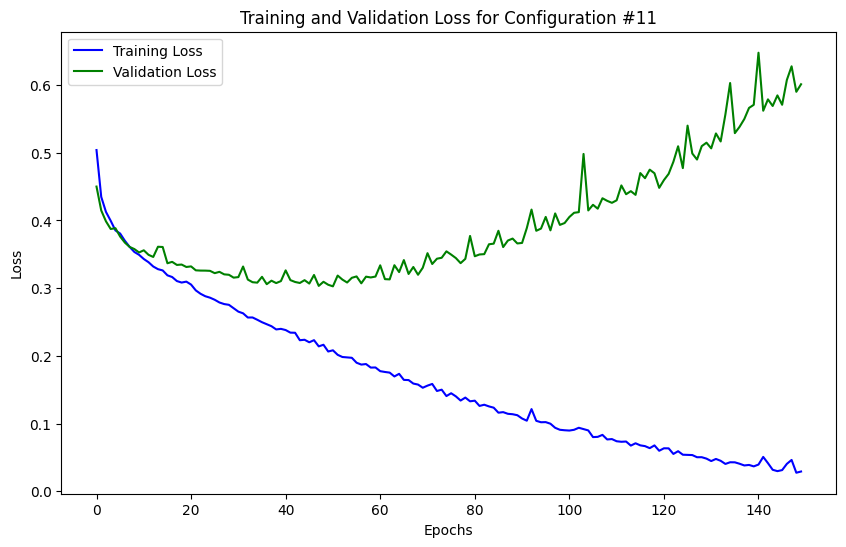

Epoch 1/80
644/644 [==============================] - 4s 4ms/step - loss: 0.4466 - accuracy: 0.7839 - val_loss: 0.4938 - val_accuracy: 0.7725
Epoch 2/80
644/644 [==============================] - 3s 5ms/step - loss: 0.3921 - accuracy: 0.8155 - val_loss: 0.3658 - val_accuracy: 0.8160
Epoch 3/80
644/644 [==============================] - 2s 4ms/step - loss: 0.3799 - accuracy: 0.8227 - val_loss: 0.3607 - val_accuracy: 0.8214
Epoch 4/80
644/644 [==============================] - 2s 4ms/step - loss: 0.3627 - accuracy: 0.8300 - val_loss: 0.3811 - val_accuracy: 0.8137
Epoch 5/80
644/644 [==============================] - 4s 7ms/step - loss: 0.3532 - accuracy: 0.8338 - val_loss: 0.3936 - val_accuracy: 0.8230
Epoch 6/80
644/644 [==============================] - 3s 5ms/step - loss: 0.3445 - accuracy: 0.8469 - val_loss: 0.3741 - val_accuracy: 0.8284
Epoch 7/80
644/644 [==============================] - 2s 3ms/step - loss: 0.3378 - accuracy: 0.8442 - val_loss: 0.4177 - val_accuracy: 0.8144
Epoch 

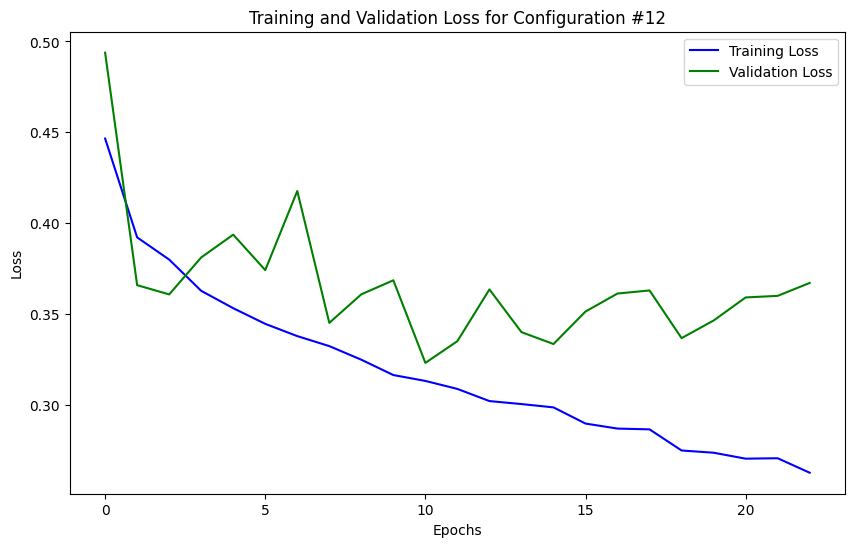

Epoch 1/90
516/516 [==============================] - 4s 5ms/step - loss: 0.5050 - accuracy: 0.7508 - val_loss: 0.4715 - val_accuracy: 0.7438
Epoch 2/90
516/516 [==============================] - 1s 3ms/step - loss: 0.4743 - accuracy: 0.7684 - val_loss: 0.4582 - val_accuracy: 0.7717
Epoch 3/90
516/516 [==============================] - 1s 2ms/step - loss: 0.4778 - accuracy: 0.7624 - val_loss: 0.4659 - val_accuracy: 0.7290
Epoch 4/90
516/516 [==============================] - 1s 2ms/step - loss: 0.4541 - accuracy: 0.7791 - val_loss: 0.4416 - val_accuracy: 0.7710
Epoch 5/90
516/516 [==============================] - 1s 2ms/step - loss: 0.4377 - accuracy: 0.7874 - val_loss: 0.4226 - val_accuracy: 0.7911
Epoch 6/90
516/516 [==============================] - 1s 2ms/step - loss: 0.4405 - accuracy: 0.7847 - val_loss: 0.4480 - val_accuracy: 0.7733
Epoch 7/90
516/516 [==============================] - 1s 3ms/step - loss: 0.4564 - accuracy: 0.7751 - val_loss: 0.4150 - val_accuracy: 0.7648
Epoch 

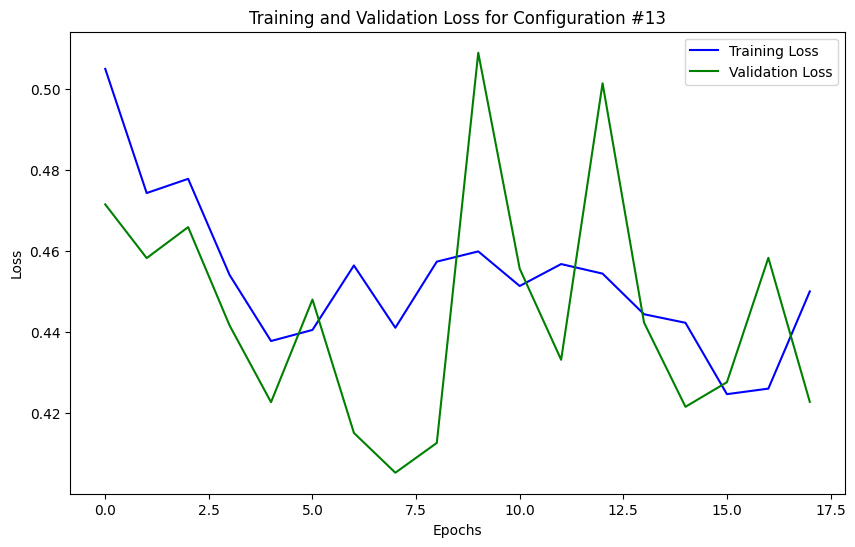

Epoch 1/120
207/207 [==============================] - 2s 5ms/step - loss: 0.4538 - accuracy: 0.7754 - val_loss: 0.4888 - val_accuracy: 0.7585
Epoch 2/120
 43/207 [=====>........................] - ETA: 0s - loss: 0.4356 - accuracy: 0.7958

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


207/207 [==============================] - 1s 4ms/step - loss: 0.4051 - accuracy: 0.8060 - val_loss: 0.4166 - val_accuracy: 0.8036
Epoch 3/120
207/207 [==============================] - 1s 5ms/step - loss: 0.3876 - accuracy: 0.8167 - val_loss: 0.3915 - val_accuracy: 0.8075
Epoch 4/120
207/207 [==============================] - 1s 6ms/step - loss: 0.3734 - accuracy: 0.8250 - val_loss: 0.3718 - val_accuracy: 0.8168
Epoch 5/120
207/207 [==============================] - 1s 5ms/step - loss: 0.3636 - accuracy: 0.8318 - val_loss: 0.3665 - val_accuracy: 0.8199
Epoch 6/120
207/207 [==============================] - 1s 6ms/step - loss: 0.3521 - accuracy: 0.8376 - val_loss: 0.3852 - val_accuracy: 0.8238
Epoch 7/120
207/207 [==============================] - 1s 6ms/step - loss: 0.3446 - accuracy: 0.8388 - val_loss: 0.3738 - val_accuracy: 0.8222
Epoch 8/120
207/207 [==============================] - 1s 6ms/step - loss: 0.3385 - accuracy: 0.8470 - val_loss: 0.4324 - val_accuracy: 0.8028
Epoch 9/120

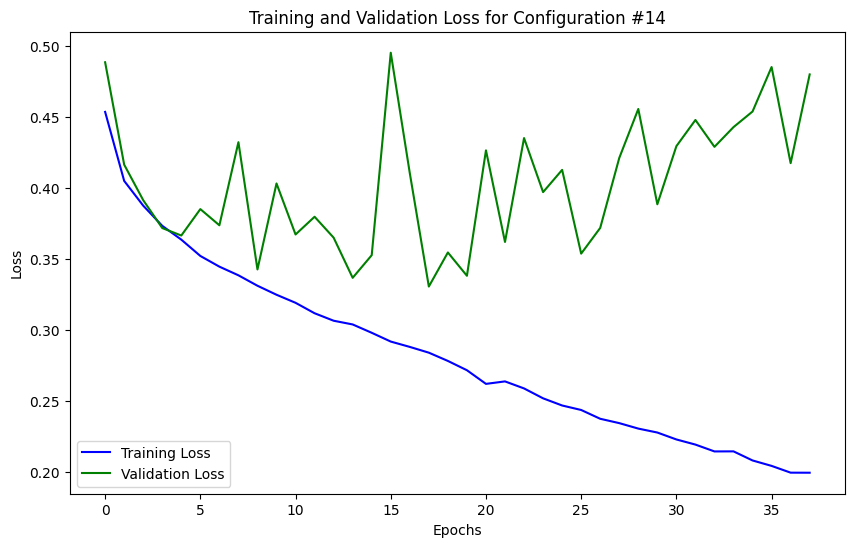

In [18]:
configuraciones = [
    (
      [(16, 'relu'), (16, 'relu')],
      32,
      {'name': 'adam', 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999},
      'binary_crossentropy',
      'accuracy',
      100,
      [EarlyStopping(monitor='val_loss', patience=10), ModelCheckpoint(filepath='/tmp/best_model.h5', monitor='val_loss', save_best_only=True)]
    ),
    (
      [(16, 'relu'), (32, 'relu'), (16, 'relu')],
      32,
      {'name': 'sgd', 'learning_rate': 0.01, 'momentum': 0.9},
      'binary_crossentropy',
      'accuracy',
      100,
      [EarlyStopping(monitor='val_loss', patience=20), ModelCheckpoint(filepath='/tmp/best_model_sgd.h5', monitor='val_loss', save_best_only=True)]
    ),
    (
      [(16, 'relu'), (16, 'relu'), (32, 'relu'), (64, 'relu')],
      32,
      {'name': 'rmsprop', 'learning_rate': 0.001, 'rho': 0.9},
      'binary_crossentropy',
      'accuracy',
      100,
      [EarlyStopping(monitor='val_loss', patience=30), ModelCheckpoint(filepath='/tmp/best_model_rmsprop.h5', monitor='val_loss', save_best_only=True)]
    ),

    # Configuraciones con Adam
    ([(16, 'relu'), (16, 'relu')], 32, {'name': 'adam', 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999}, 'binary_crossentropy', 'accuracy', 100, [EarlyStopping(monitor='val_loss', patience=10), ModelCheckpoint(filepath='/tmp/best_model_adam.h5', monitor='val_loss', save_best_only=True)]),
    ([(32, 'relu'), (16, 'relu')], 64, {'name': 'adam', 'learning_rate': 0.0005, 'beta_1': 0.9, 'beta_2': 0.999}, 'binary_crossentropy', 'accuracy', 50, [EarlyStopping(monitor='val_loss', patience=10)]),
    ([(64, 'relu'), (32, 'relu'), (16, 'relu')], 32, {'name': 'adam', 'learning_rate': 0.002, 'beta_1': 0.9, 'beta_2': 0.999}, 'binary_crossentropy', 'accuracy', 150, [EarlyStopping(monitor='val_loss', patience=15)]),

    # Configuraciones con SGD
    ([(16, 'relu'), (16, 'relu')], 32, {'name': 'sgd', 'learning_rate': 0.01, 'momentum': 0.9}, 'binary_crossentropy', 'accuracy', 100, [EarlyStopping(monitor='val_loss', patience=10), ModelCheckpoint(filepath='/tmp/best_model_sgd.h5', monitor='val_loss', save_best_only=True)]),
    ([(32, 'relu'), (32, 'relu')], 16, {'name': 'sgd', 'learning_rate': 0.02, 'momentum': 0.8}, 'binary_crossentropy', 'accuracy', 120, [EarlyStopping(monitor='val_loss', patience=20)]),

    # Configuraciones con RMSprop
    ([(16, 'relu'), (16, 'relu')], 32, {'name': 'rmsprop', 'learning_rate': 0.001, 'rho': 0.9}, 'binary_crossentropy', 'accuracy', 100, [EarlyStopping(monitor='val_loss', patience=10), ModelCheckpoint(filepath='/tmp/best_model_rmsprop.h5', monitor='val_loss', save_best_only=True)]),
    ([(64, 'relu')], 64, {'name': 'rmsprop', 'learning_rate': 0.0001, 'rho': 0.9}, 'binary_crossentropy', 'accuracy', 200, [EarlyStopping(monitor='val_loss', patience=5)]),

    # Variaciones adicionales con Adam
    ([(128, 'relu'), (64, 'relu'), (32, 'relu')], 128, {'name': 'adam', 'learning_rate': 0.0001, 'beta_1': 0.95, 'beta_2': 0.999}, 'binary_crossentropy', 'accuracy', 150, [ModelCheckpoint(filepath='/tmp/best_model_adam_large.h5', monitor='val_loss', save_best_only=True)]),
    ([(32, 'relu'), (32, 'relu'), (32, 'relu')], 16, {'name': 'adam', 'learning_rate': 0.005, 'beta_1': 0.85, 'beta_2': 0.999}, 'binary_crossentropy', 'accuracy', 80, [EarlyStopping(monitor='val_loss', patience=12)]),

    # Ejemplo con arquitectura y optimizador variado
    ([(20, 'tanh'), (20, 'tanh')], 20, {'name': 'sgd', 'learning_rate': 0.01, 'momentum': 0.95}, 'binary_crossentropy', 'accuracy', 90, [EarlyStopping(monitor='val_loss', patience=10)]),
    ([(50, 'relu'), (50, 'relu'), (50, 'relu')], 50, {'name': 'rmsprop', 'learning_rate': 0.0005, 'rho': 0.88}, 'binary_crossentropy', 'accuracy', 120, [ModelCheckpoint(filepath='/tmp/best_model_complex.h5', monitor='val_loss', save_best_only=True), EarlyStopping(monitor='val_loss', patience=20)])
]

# run it
df_resultados = entrenar_y_registrar_resultados(df_mistery_train, Y_train, df_mistery_val, Y_val, configuraciones)


In [19]:
df_resultados

,Config Index,Arquitectura,Batch Size,Optimizer,Learning Rate,Beta 1,Beta 2,Momentum,Rho,Loss,Accuracy,Val Loss,Val Accuracy,Epochs,Callbacks
0,1,"[(16, 'relu'), (16, 'relu')]",32,adam,0.0010,0.9,0.999,N/A,N/A,0.212642,0.910706,0.343193,0.850932,100,"EarlyStopping, ModelCheckpoint"
1,2,"[(16, 'relu'), (32, 'relu'), (16, 'relu')]",32,sgd,0.0100,N/A,N/A,0.9,N/A,0.292543,0.865961,0.398605,0.818323,100,"EarlyStopping, ModelCheckpoint"
2,3,"[(16, 'relu'), (16, 'relu'), (32, 'relu'), (64...",32,rmsprop,0.0010,N/A,N/A,N/A,0.9,0.218414,0.907988,0.392287,0.850155,100,"EarlyStopping, ModelCheckpoint"
3,4,"[(16, 'relu'), (16, 'relu')]",32,adam,0.0010,0.9,0.999,N/A,N/A,0.252618,0.885858,0.338402,0.854814,100,"EarlyStopping, ModelCheckpoint"
4,5,"[(32, 'relu'), (16, 'relu')]",64,adam,0.0005,0.9,0.999,N/A,N/A,0.209854,0.908959,0.389368,0.833851,50,EarlyStopping
5,6,"[(64, 'relu'), (32, 'relu'), (16, 'relu')]",32,adam,0.0020,0.9,0.999,N/A,N/A,0.236090,0.900029,0.328742,0.850932,150,EarlyStopping
6,7,"[(16, 'relu'), (16, 'relu')]",32,sgd,0.0100,N/A,N/A,0.9,N/A,0.320974,0.852082,0.351428,0.833851,100,"EarlyStopping, ModelCheckpoint"
7,8,"[(32, 'relu'), (32, 'relu')]",16,sgd,0.0200,N/A,N/A,0.8,N/A,0.295523,0.863729,0.354144,0.834627,120,EarlyStopping
8,9,"[(16, 'relu'), (16, 'relu')]",32,rmsprop,0.0010,N/A,N/A,N/A,0.9,0.280762,0.876735,0.372409,0.845497,100,"EarlyStopping, ModelCheckpoint"
9,10,"[(64, 'relu')]",64,rmsprop,0.0001,N/A,N/A,N/A,0.9,0.266036,0.885567,0.325074,0.851708,200,EarlyStopping


#Arquitectura escalonada

Epoch 1/100
644/644 [==============================] - 17s 24ms/step - loss: 0.4398 - accuracy: 0.7847 - val_loss: 0.3840 - val_accuracy: 0.8137
Epoch 2/100
  1/644 [..............................] - ETA: 20s - loss: 0.4430 - accuracy: 0.7500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


644/644 [==============================] - 16s 25ms/step - loss: 0.3895 - accuracy: 0.8147 - val_loss: 0.3767 - val_accuracy: 0.8175
Epoch 3/100
644/644 [==============================] - 17s 26ms/step - loss: 0.3799 - accuracy: 0.8228 - val_loss: 0.4164 - val_accuracy: 0.8043
Epoch 4/100
644/644 [==============================] - 15s 24ms/step - loss: 0.3621 - accuracy: 0.8290 - val_loss: 0.4420 - val_accuracy: 0.7865
Epoch 5/100
644/644 [==============================] - 15s 23ms/step - loss: 0.3502 - accuracy: 0.8381 - val_loss: 0.4229 - val_accuracy: 0.8129
Epoch 6/100
644/644 [==============================] - 15s 24ms/step - loss: 0.3421 - accuracy: 0.8440 - val_loss: 0.3581 - val_accuracy: 0.8370
Epoch 7/100
644/644 [==============================] - 15s 23ms/step - loss: 0.3302 - accuracy: 0.8470 - val_loss: 0.3419 - val_accuracy: 0.8455
Epoch 8/100
644/644 [==============================] - 16s 24ms/step - loss: 0.3146 - accuracy: 0.8555 - val_loss: 0.3518 - val_accuracy: 0.84

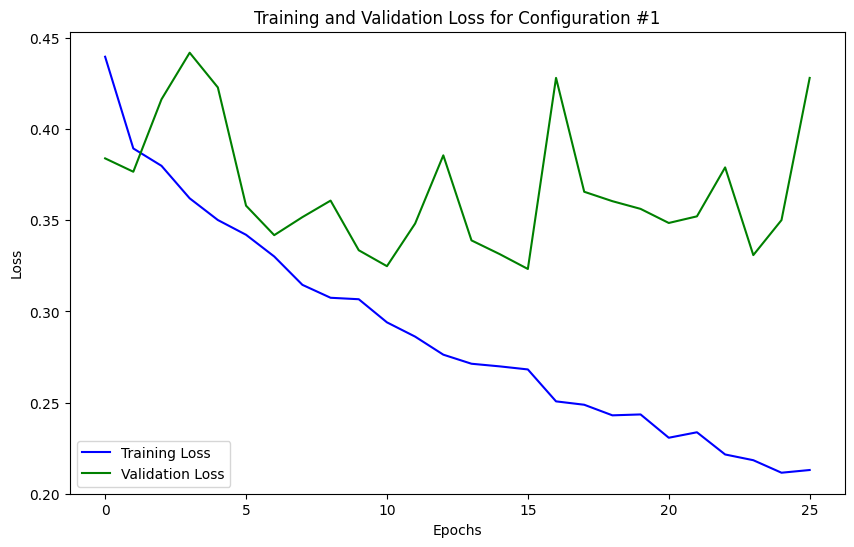

Epoch 1/100
1288/1288 [==============================] - 34s 25ms/step - loss: 0.4470 - accuracy: 0.7826 - val_loss: 0.3825 - val_accuracy: 0.8152
Epoch 2/100
   4/1288 [..............................] - ETA: 29s - loss: 0.5051 - accuracy: 0.7188

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1288/1288 [==============================] - 31s 24ms/step - loss: 0.3972 - accuracy: 0.8138 - val_loss: 0.3855 - val_accuracy: 0.8269
Epoch 3/100
1288/1288 [==============================] - 31s 24ms/step - loss: 0.3776 - accuracy: 0.8233 - val_loss: 0.4043 - val_accuracy: 0.7803
Epoch 4/100
1288/1288 [==============================] - 31s 24ms/step - loss: 0.3615 - accuracy: 0.8291 - val_loss: 0.4321 - val_accuracy: 0.7694
Epoch 5/100
1288/1288 [==============================] - 33s 26ms/step - loss: 0.3504 - accuracy: 0.8399 - val_loss: 0.3493 - val_accuracy: 0.8346
Epoch 6/100
1288/1288 [==============================] - 32s 25ms/step - loss: 0.3454 - accuracy: 0.8421 - val_loss: 0.3478 - val_accuracy: 0.8377
Epoch 7/100
1288/1288 [==============================] - 31s 24ms/step - loss: 0.3312 - accuracy: 0.8458 - val_loss: 0.3607 - val_accuracy: 0.8401
Epoch 8/100
1288/1288 [==============================] - 33s 26ms/step - loss: 0.3271 - accuracy: 0.8518 - val_loss: 0.4157 - val_

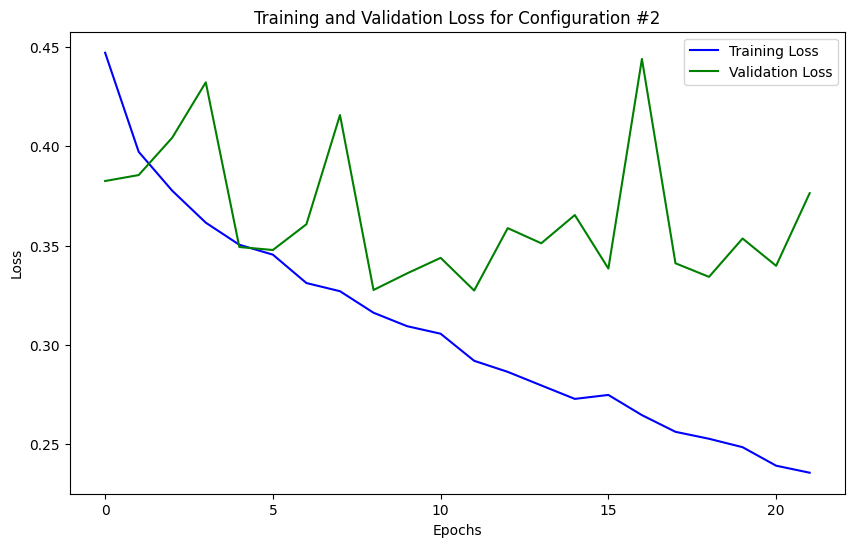

In [15]:
configuraciones = [
    (
      [(1024, 'relu'), (512, 'relu'), (128, 'relu'), (16, 'relu')],
      16,
      {'name': 'adam', 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999},
      'binary_crossentropy',
      'accuracy',
      100,
      [EarlyStopping(monitor='val_loss', patience=10), ModelCheckpoint(filepath='/tmp/best_model.h5', monitor='val_loss', save_best_only=True)]
    ),
    (
      [(1024, 'relu'), (512, 'relu'), (256, 'relu'), (128, 'relu'), (64, 'relu')],
      8,
      {'name': 'adam', 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999},
      'binary_crossentropy',
      'accuracy',
      100,
      [EarlyStopping(monitor='val_loss', patience=10), ModelCheckpoint(filepath='/tmp/best_model.h5', monitor='val_loss', save_best_only=True)]
    ),
]
# run it
df_resultados = entrenar_y_registrar_resultados(df_mistery_train, Y_train, df_mistery_val, Y_val, configuraciones)

In [16]:
df_resultados

,Config Index,Arquitectura,Batch Size,Optimizer,Learning Rate,Beta 1,Beta 2,Momentum,Rho,Loss,Accuracy,Val Loss,Val Accuracy,Epochs,Callbacks
0,1,"[(1024, 'relu'), (512, 'relu'), (128, 'relu'),...",16,adam,0.001,0.9,0.999,N/A,N/A,0.212997,0.908959,0.428176,0.859472,100,"EarlyStopping, ModelCheckpoint"
1,2,"[(1024, 'relu'), (512, 'relu'), (256, 'relu'),...",8,adam,0.001,0.9,0.999,N/A,N/A,0.235737,0.897797,0.376385,0.845497,100,"EarlyStopping, ModelCheckpoint"


# Grid Search

In [37]:
import itertools
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Definir los rangos de hiperparámetros para Grid Search
arquitecturas = [
    [(16, 'relu'), (32, 'relu')],  # Arquitectura con dos capas
    [(32, 'relu'), (16, 'relu')],  # Otra arquitectura con dos capas en orden inverso
    [(16, 'relu')],  # Arquitectura con una sola capa
    # Añade más variaciones según sea necesario
]
batch_sizes = [16, 32]
learning_rates = [0.01, 0.001]
epochs = [50, 100]
callbacks_list = [[EarlyStopping(monitor='val_loss', patience=10), ModelCheckpoint(filepath='/tmp/best_model.h5', monitor='val_loss', save_best_only=True)]]

# Generar todas las combinaciones posibles de hiperparámetros
configuraciones_grid = list(itertools.product(arquitecturas, batch_sizes, learning_rates, epochs, callbacks_list))

# Convertir a la estructura de configuraciones esperada
configuraciones_grid = [
    (arq, bs, {'name': 'adam', 'learning_rate': lr, 'beta_1': 0.9, 'beta_2': 0.999}, 'binary_crossentropy', 'accuracy', ep, cb)
    for arq, bs, lr, ep, cb in itertools.product(arquitecturas, batch_sizes, learning_rates, epochs, callbacks_list)
]

In [38]:
configuraciones_grid

[([(16, 'relu'), (32, 'relu')],
  16,
  {'name': 'adam', 'learning_rate': 0.01, 'beta_1': 0.9, 'beta_2': 0.999},
  'binary_crossentropy',
  'accuracy',
  50,
   <keras.src.callbacks.ModelCheckpoint at 0x79f2cd3c87c0>]),
 ([(16, 'relu'), (32, 'relu')],
  16,
  {'name': 'adam', 'learning_rate': 0.01, 'beta_1': 0.9, 'beta_2': 0.999},
  'binary_crossentropy',
  'accuracy',
  100,
   <keras.src.callbacks.ModelCheckpoint at 0x79f2cd3c87c0>]),
 ([(16, 'relu'), (32, 'relu')],
  16,
  {'name': 'adam', 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999},
  'binary_crossentropy',
  'accuracy',
  50,
   <keras.src.callbacks.ModelCheckpoint at 0x79f2cd3c87c0>]),
 ([(16, 'relu'), (32, 'relu')],
  16,
  {'name': 'adam', 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999},
  'binary_crossentropy',
  'accuracy',
  100,
   <keras.src.callbacks.ModelCheckpoint at 0x79f2cd3c87c0>]),
 ([(16, 'relu'), (32, 'relu')],
  32,
  {'name': 'adam', 'learning_rate': 0.01, 'beta_1': 0.9, 'beta_2': 0.999},
  '

In [39]:
def entrenar_modelo_2(X_train, Y_train, X_val, Y_val, arquitectura, batch_size, optimizer_info, loss, metrics, epochs, callbacks):
    model = Sequential()

    # Asegúrate de que la primera capa incluya el shape de entrada
    model.add(Dense(arquitectura[0][0], activation=arquitectura[0][1], input_shape=(X_train.shape[1],)))

    # Para las capas subsiguientes, ya no necesitas especificar el tamaño de entrada
    for unidades, activacion in arquitectura[1:]:
        model.add(Dense(unidades, activation=activacion))
    # salida
    model.add(Dense(1, activation='sigmoid'))

    # Configurar el optimizador basado en el nombre y los parámetros dados
    optimizer_name = optimizer_info['name']
    if optimizer_name == 'adam':
        optimizer = Adam(
            learning_rate=optimizer_info.get('learning_rate', 0.001),
            beta_1=optimizer_info.get('beta_1', 0.9),
            beta_2=optimizer_info.get('beta_2', 0.999))
    elif optimizer_name == 'sgd':
        optimizer = SGD(
            learning_rate=optimizer_info.get('learning_rate', 0.01),
            momentum=optimizer_info.get('momentum', 0.0))
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(
            learning_rate=optimizer_info.get('learning_rate', 0.001),
            rho=optimizer_info.get('rho', 0.9))

    model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

    history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, callbacks=callbacks)

    return model, history


In [42]:
def entrenar_y_registrar_resultados_2(X_train, Y_train, X_val, Y_val, configuraciones):
    resultados = []

    # Usa enumerate para obtener tanto el índice (config_index) como el valor (config)
    for config_index, config in enumerate(configuraciones, start=1):
        # Desempaquetar la configuración actual
        arquitectura, batch_size, optimizer_info, loss, metrics, epochs, callbacks = config

        # Llama a entrenar_modelo con los parámetros desempaquetados
        model, history = entrenar_modelo_2(X_train, Y_train, X_val, Y_val, arquitectura, batch_size, optimizer_info, loss, metrics, epochs, callbacks)

        # Extrae las métricas de la última época registrada
        loss_final = history.history['loss'][-1]
        accuracy_final = history.history['accuracy'][-1]
        val_loss_final = history.history['val_loss'][-1]
        val_accuracy_final = history.history['val_accuracy'][-1]

        # Añade los resultados a la lista
        resultados.append({
            'Arquitectura': str(arquitectura),
            'Batch Size': batch_size,
            'Optimizer': optimizer_info['name'],
            'Learning Rate': optimizer_info['learning_rate'],
            'Loss': loss_final,
            'Accuracy': accuracy_final,
            'Val Loss': val_loss_final,
            'Val Accuracy': val_accuracy_final,
            'Epochs': epochs,
            'Callbacks': ', '.join([type(cb).__name__ for cb in callbacks]),
        })

        # Generar y mostrar gráficos para cada configuración
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'], 'b', label='Training Loss')
        plt.plot(history.history['val_loss'], 'g', label='Validation Loss')
        plt.title(f'Training and Validation Loss for Configuration #{config_index}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    # Convertir los resultados a un DataFrame y guardarlo en un archivo Excel
    df_resultados = pd.DataFrame(resultados)
    df_resultados.to_excel('resultados_entrenamiento.xlsx', index=False)

    return df_resultados



Epoch 1/50
644/644 [==============================] - 6s 6ms/step - loss: 0.4433 - accuracy: 0.7839 - val_loss: 0.4025 - val_accuracy: 0.8043
Epoch 2/50
644/644 [==============================] - 3s 5ms/step - loss: 0.3933 - accuracy: 0.8164 - val_loss: 0.3729 - val_accuracy: 0.8199
Epoch 3/50
644/644 [==============================] - 3s 5ms/step - loss: 0.3751 - accuracy: 0.8234 - val_loss: 0.3726 - val_accuracy: 0.8129
Epoch 4/50
644/644 [==============================] - 5s 7ms/step - loss: 0.3698 - accuracy: 0.8316 - val_loss: 0.4556 - val_accuracy: 0.7888
Epoch 5/50
644/644 [==============================] - 3s 5ms/step - loss: 0.3601 - accuracy: 0.8337 - val_loss: 0.3635 - val_accuracy: 0.8183
Epoch 6/50
644/644 [==============================] - 3s 5ms/step - loss: 0.3563 - accuracy: 0.8337 - val_loss: 0.3713 - val_accuracy: 0.8152
Epoch 7/50
644/644 [==============================] - 4s 6ms/step - loss: 0.3510 - accuracy: 0.8380 - val_loss: 0.3687 - val_accuracy: 0.8160
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


644/644 [==============================] - 4s 7ms/step - loss: 0.3077 - accuracy: 0.8589 - val_loss: 0.3417 - val_accuracy: 0.8455
Epoch 24/50
644/644 [==============================] - 3s 5ms/step - loss: 0.3048 - accuracy: 0.8610 - val_loss: 0.3409 - val_accuracy: 0.8447
Epoch 25/50
644/644 [==============================] - 4s 7ms/step - loss: 0.2944 - accuracy: 0.8701 - val_loss: 0.3447 - val_accuracy: 0.8432
Epoch 26/50
644/644 [==============================] - 5s 7ms/step - loss: 0.3002 - accuracy: 0.8639 - val_loss: 0.3522 - val_accuracy: 0.8339
Epoch 27/50
644/644 [==============================] - 4s 6ms/step - loss: 0.2972 - accuracy: 0.8680 - val_loss: 0.3758 - val_accuracy: 0.8354
Epoch 28/50
644/644 [==============================] - 3s 5ms/step - loss: 0.2999 - accuracy: 0.8688 - val_loss: 0.3648 - val_accuracy: 0.8346
Epoch 29/50
644/644 [==============================] - 3s 5ms/step - loss: 0.3011 - accuracy: 0.8655 - val_loss: 0.3523 - val_accuracy: 0.8416
Epoch 30/50

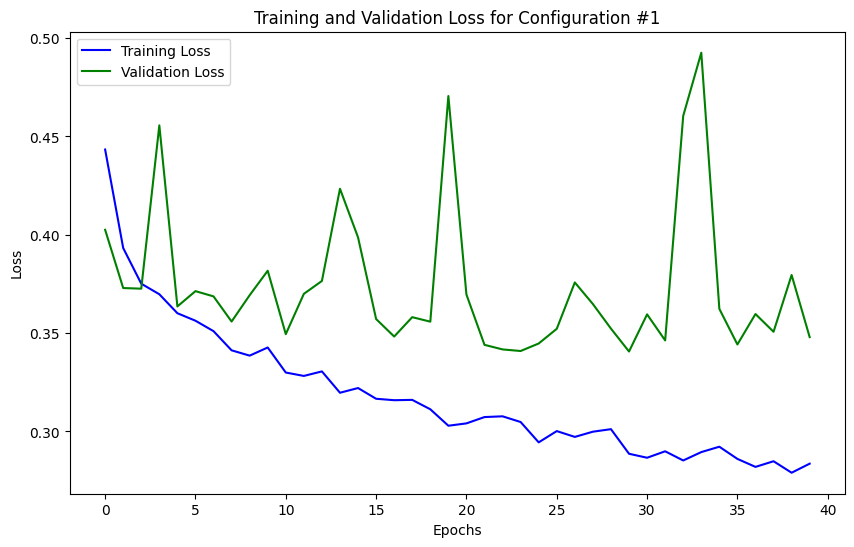

Epoch 1/100
644/644 [==============================] - 2s 2ms/step - loss: 0.4442 - accuracy: 0.7879 - val_loss: 0.4068 - val_accuracy: 0.8106
Epoch 2/100
644/644 [==============================] - 1s 2ms/step - loss: 0.3976 - accuracy: 0.8082 - val_loss: 0.3882 - val_accuracy: 0.8230
Epoch 3/100
644/644 [==============================] - 2s 2ms/step - loss: 0.3808 - accuracy: 0.8237 - val_loss: 0.4045 - val_accuracy: 0.8067
Epoch 4/100
644/644 [==============================] - 2s 3ms/step - loss: 0.3725 - accuracy: 0.8235 - val_loss: 0.3723 - val_accuracy: 0.8269
Epoch 5/100
644/644 [==============================] - 2s 3ms/step - loss: 0.3613 - accuracy: 0.8322 - val_loss: 0.3803 - val_accuracy: 0.8222
Epoch 6/100
644/644 [==============================] - 1s 2ms/step - loss: 0.3547 - accuracy: 0.8380 - val_loss: 0.3726 - val_accuracy: 0.8323
Epoch 7/100
644/644 [==============================] - 1s 2ms/step - loss: 0.3504 - accuracy: 0.8386 - val_loss: 0.3552 - val_accuracy: 0.8408

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


644/644 [==============================] - 2s 3ms/step - loss: 0.3063 - accuracy: 0.8603 - val_loss: 0.3525 - val_accuracy: 0.8455
Epoch 22/100
644/644 [==============================] - 2s 3ms/step - loss: 0.3063 - accuracy: 0.8605 - val_loss: 0.3364 - val_accuracy: 0.8416
Epoch 23/100
644/644 [==============================] - 2s 2ms/step - loss: 0.3028 - accuracy: 0.8619 - val_loss: 0.3414 - val_accuracy: 0.8478
Epoch 24/100
644/644 [==============================] - 1s 2ms/step - loss: 0.3070 - accuracy: 0.8609 - val_loss: 0.3455 - val_accuracy: 0.8455
Epoch 25/100
644/644 [==============================] - 2s 3ms/step - loss: 0.3079 - accuracy: 0.8647 - val_loss: 0.3421 - val_accuracy: 0.8424
Epoch 26/100
644/644 [==============================] - 1s 2ms/step - loss: 0.3012 - accuracy: 0.8658 - val_loss: 0.3535 - val_accuracy: 0.8455
Epoch 27/100
644/644 [==============================] - 1s 2ms/step - loss: 0.2945 - accuracy: 0.8663 - val_loss: 0.3618 - val_accuracy: 0.8137
Epoch

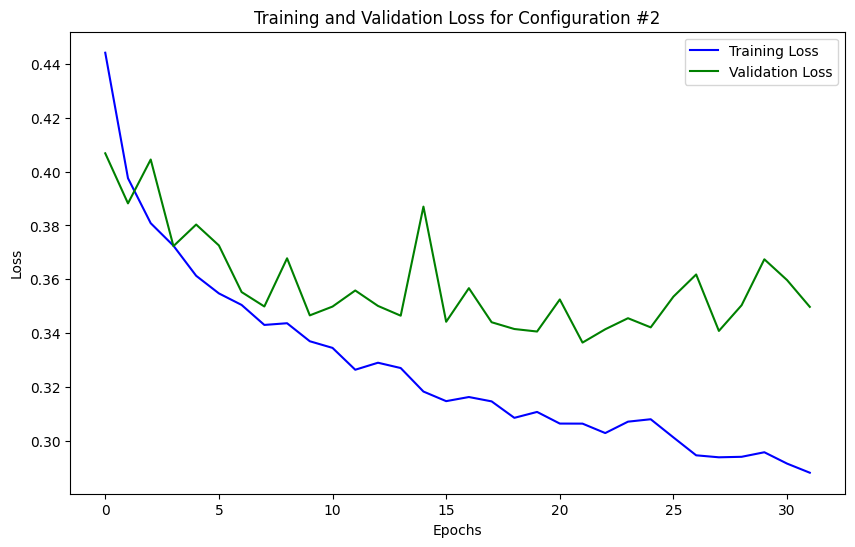

Epoch 1/50
644/644 [==============================] - 3s 3ms/step - loss: 0.4317 - accuracy: 0.7890 - val_loss: 0.3813 - val_accuracy: 0.8168
Epoch 2/50
644/644 [==============================] - 2s 2ms/step - loss: 0.3861 - accuracy: 0.8174 - val_loss: 0.3714 - val_accuracy: 0.8113
Epoch 3/50
644/644 [==============================] - 2s 3ms/step - loss: 0.3692 - accuracy: 0.8264 - val_loss: 0.3661 - val_accuracy: 0.8214
Epoch 4/50
644/644 [==============================] - 2s 4ms/step - loss: 0.3613 - accuracy: 0.8325 - val_loss: 0.4485 - val_accuracy: 0.7733
Epoch 5/50
644/644 [==============================] - 2s 3ms/step - loss: 0.3513 - accuracy: 0.8359 - val_loss: 0.3594 - val_accuracy: 0.8339
Epoch 6/50
644/644 [==============================] - 2s 3ms/step - loss: 0.3383 - accuracy: 0.8447 - val_loss: 0.3665 - val_accuracy: 0.8354
Epoch 7/50
644/644 [==============================] - 3s 4ms/step - loss: 0.3285 - accuracy: 0.8503 - val_loss: 0.3431 - val_accuracy: 0.8393
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


644/644 [==============================] - 1s 2ms/step - loss: 0.2917 - accuracy: 0.8669 - val_loss: 0.3436 - val_accuracy: 0.8346
Epoch 16/50
644/644 [==============================] - 1s 2ms/step - loss: 0.2855 - accuracy: 0.8737 - val_loss: 0.3345 - val_accuracy: 0.8470
Epoch 17/50
644/644 [==============================] - 2s 2ms/step - loss: 0.2842 - accuracy: 0.8729 - val_loss: 0.3304 - val_accuracy: 0.8486
Epoch 18/50
644/644 [==============================] - 1s 2ms/step - loss: 0.2725 - accuracy: 0.8793 - val_loss: 0.3863 - val_accuracy: 0.8354
Epoch 19/50
644/644 [==============================] - 5s 8ms/step - loss: 0.2722 - accuracy: 0.8828 - val_loss: 0.3406 - val_accuracy: 0.8478
Epoch 20/50
644/644 [==============================] - 4s 7ms/step - loss: 0.2701 - accuracy: 0.8794 - val_loss: 0.3335 - val_accuracy: 0.8525
Epoch 21/50
644/644 [==============================] - 4s 7ms/step - loss: 0.2690 - accuracy: 0.8809 - val_loss: 0.3514 - val_accuracy: 0.8424
Epoch 22/50

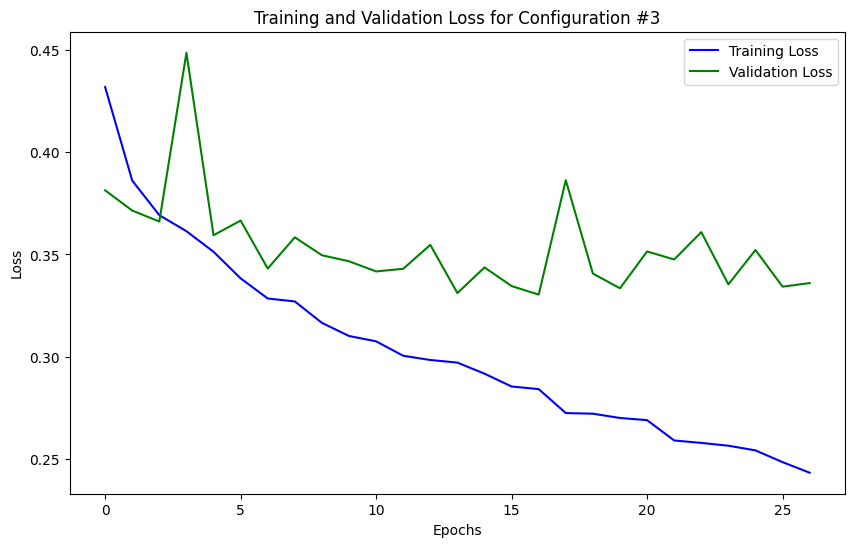

Epoch 1/100
644/644 [==============================] - 6s 7ms/step - loss: 0.4345 - accuracy: 0.7880 - val_loss: 0.4012 - val_accuracy: 0.8028
Epoch 2/100
644/644 [==============================] - 3s 5ms/step - loss: 0.3913 - accuracy: 0.8097 - val_loss: 0.3931 - val_accuracy: 0.8059
Epoch 3/100
644/644 [==============================] - 3s 5ms/step - loss: 0.3749 - accuracy: 0.8229 - val_loss: 0.3734 - val_accuracy: 0.8253
Epoch 4/100
644/644 [==============================] - 3s 4ms/step - loss: 0.3654 - accuracy: 0.8248 - val_loss: 0.3841 - val_accuracy: 0.8339
Epoch 5/100
644/644 [==============================] - 3s 5ms/step - loss: 0.3485 - accuracy: 0.8399 - val_loss: 0.3769 - val_accuracy: 0.8292
Epoch 6/100
644/644 [==============================] - 2s 3ms/step - loss: 0.3422 - accuracy: 0.8404 - val_loss: 0.3593 - val_accuracy: 0.8370
Epoch 7/100
644/644 [==============================] - 3s 5ms/step - loss: 0.3334 - accuracy: 0.8452 - val_loss: 0.3508 - val_accuracy: 0.8377

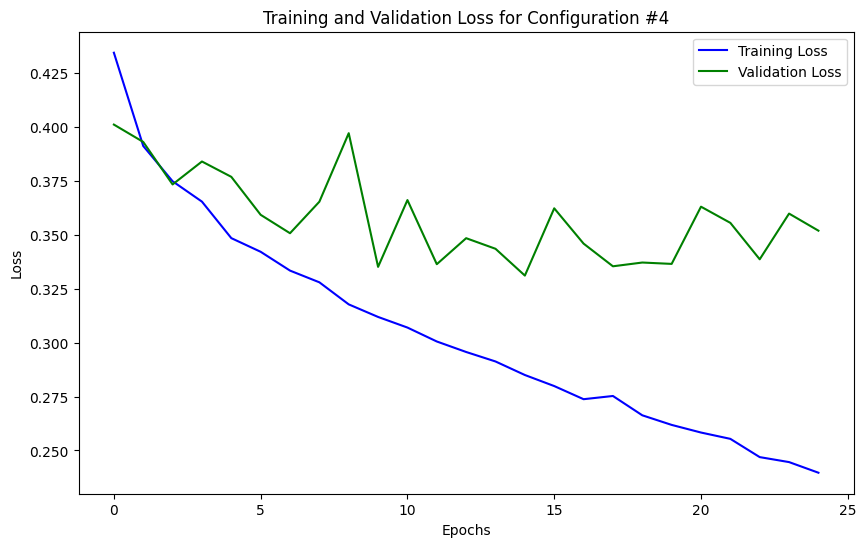

Epoch 1/50
322/322 [==============================] - 3s 5ms/step - loss: 0.4559 - accuracy: 0.7697 - val_loss: 0.4045 - val_accuracy: 0.7935
Epoch 2/50
322/322 [==============================] - 2s 6ms/step - loss: 0.4032 - accuracy: 0.7991 - val_loss: 0.3797 - val_accuracy: 0.8152
Epoch 3/50
322/322 [==============================] - 2s 5ms/step - loss: 0.3805 - accuracy: 0.8199 - val_loss: 0.3625 - val_accuracy: 0.8245
Epoch 4/50
322/322 [==============================] - 2s 6ms/step - loss: 0.3668 - accuracy: 0.8235 - val_loss: 0.3692 - val_accuracy: 0.8339
Epoch 5/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3596 - accuracy: 0.8285 - val_loss: 0.3882 - val_accuracy: 0.8152
Epoch 6/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3497 - accuracy: 0.8322 - val_loss: 0.3900 - val_accuracy: 0.8168
Epoch 7/50
322/322 [==============================] - 1s 3ms/step - loss: 0.3455 - accuracy: 0.8381 - val_loss: 0.3642 - val_accuracy: 0.8207
Epoch 

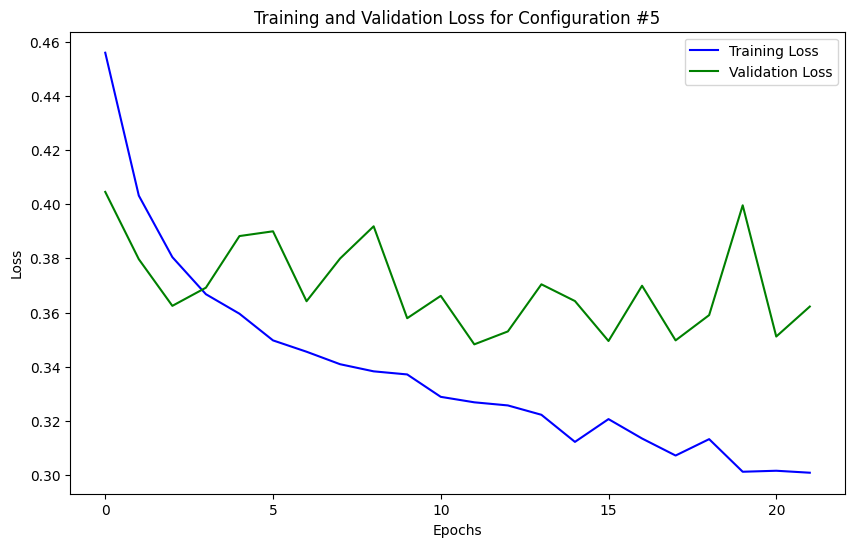

Epoch 1/100
322/322 [==============================] - 2s 3ms/step - loss: 0.4514 - accuracy: 0.7772 - val_loss: 0.4267 - val_accuracy: 0.7981
Epoch 2/100
322/322 [==============================] - 1s 3ms/step - loss: 0.4038 - accuracy: 0.8050 - val_loss: 0.4028 - val_accuracy: 0.8020
Epoch 3/100
322/322 [==============================] - 3s 10ms/step - loss: 0.3762 - accuracy: 0.8212 - val_loss: 0.3749 - val_accuracy: 0.8175
Epoch 4/100
322/322 [==============================] - 4s 11ms/step - loss: 0.3658 - accuracy: 0.8305 - val_loss: 0.3696 - val_accuracy: 0.8230
Epoch 5/100
322/322 [==============================] - 3s 9ms/step - loss: 0.3568 - accuracy: 0.8317 - val_loss: 0.3661 - val_accuracy: 0.8245
Epoch 6/100
322/322 [==============================] - 3s 8ms/step - loss: 0.3555 - accuracy: 0.8285 - val_loss: 0.3602 - val_accuracy: 0.8245
Epoch 7/100
322/322 [==============================] - 2s 8ms/step - loss: 0.3405 - accuracy: 0.8396 - val_loss: 0.3951 - val_accuracy: 0.83

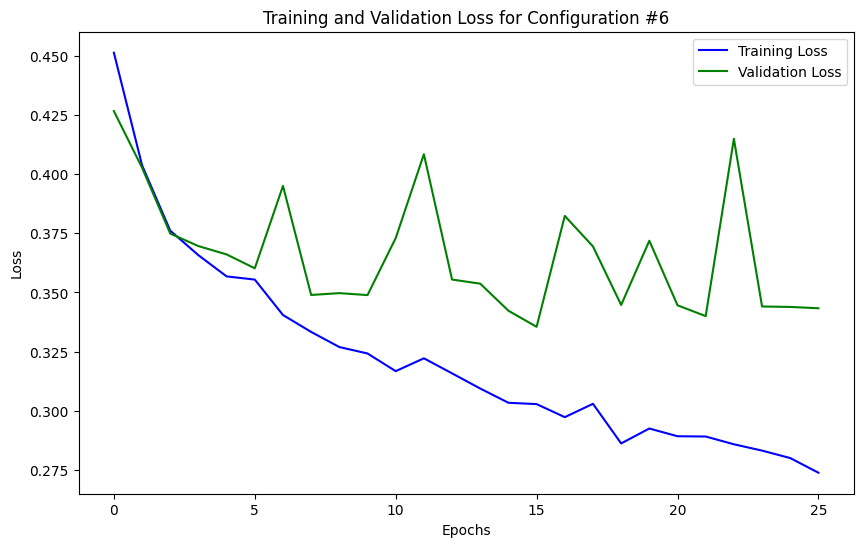

Epoch 1/50
322/322 [==============================] - 2s 3ms/step - loss: 0.4434 - accuracy: 0.7787 - val_loss: 0.3970 - val_accuracy: 0.8059
Epoch 2/50
322/322 [==============================] - 1s 2ms/step - loss: 0.3908 - accuracy: 0.8135 - val_loss: 0.3756 - val_accuracy: 0.8199
Epoch 3/50
322/322 [==============================] - 1s 2ms/step - loss: 0.3695 - accuracy: 0.8278 - val_loss: 0.3974 - val_accuracy: 0.8012
Epoch 4/50
322/322 [==============================] - 1s 5ms/step - loss: 0.3571 - accuracy: 0.8323 - val_loss: 0.3731 - val_accuracy: 0.8222
Epoch 5/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3482 - accuracy: 0.8407 - val_loss: 0.3672 - val_accuracy: 0.8238
Epoch 6/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3400 - accuracy: 0.8416 - val_loss: 0.3517 - val_accuracy: 0.8238
Epoch 7/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3345 - accuracy: 0.8485 - val_loss: 0.3513 - val_accuracy: 0.8261
Epoch 

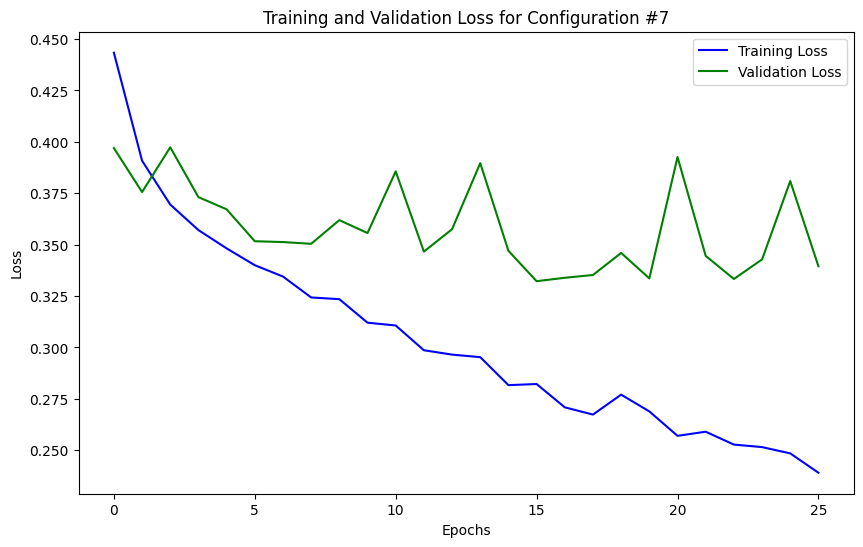

Epoch 1/100
322/322 [==============================] - 2s 3ms/step - loss: 0.4459 - accuracy: 0.7802 - val_loss: 0.4246 - val_accuracy: 0.7927
Epoch 2/100
322/322 [==============================] - 1s 4ms/step - loss: 0.3918 - accuracy: 0.8130 - val_loss: 0.3750 - val_accuracy: 0.8129
Epoch 3/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3678 - accuracy: 0.8277 - val_loss: 0.3818 - val_accuracy: 0.8129
Epoch 4/100
322/322 [==============================] - 1s 4ms/step - loss: 0.3638 - accuracy: 0.8312 - val_loss: 0.3769 - val_accuracy: 0.8261
Epoch 5/100
322/322 [==============================] - 1s 4ms/step - loss: 0.3479 - accuracy: 0.8365 - val_loss: 0.3499 - val_accuracy: 0.8385
Epoch 6/100
322/322 [==============================] - 1s 4ms/step - loss: 0.3389 - accuracy: 0.8401 - val_loss: 0.3526 - val_accuracy: 0.8393
Epoch 7/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3337 - accuracy: 0.8433 - val_loss: 0.4082 - val_accuracy: 0.8005

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


322/322 [==============================] - 1s 2ms/step - loss: 0.2804 - accuracy: 0.8747 - val_loss: 0.3286 - val_accuracy: 0.8455
Epoch 18/100
322/322 [==============================] - 1s 3ms/step - loss: 0.2764 - accuracy: 0.8783 - val_loss: 0.3303 - val_accuracy: 0.8439
Epoch 19/100
322/322 [==============================] - 1s 3ms/step - loss: 0.2752 - accuracy: 0.8739 - val_loss: 0.3394 - val_accuracy: 0.8470
Epoch 20/100
322/322 [==============================] - 1s 3ms/step - loss: 0.2647 - accuracy: 0.8826 - val_loss: 0.3278 - val_accuracy: 0.8478
Epoch 21/100
322/322 [==============================] - 1s 4ms/step - loss: 0.2651 - accuracy: 0.8836 - val_loss: 0.3519 - val_accuracy: 0.8455
Epoch 22/100
322/322 [==============================] - 1s 4ms/step - loss: 0.2616 - accuracy: 0.8830 - val_loss: 0.3345 - val_accuracy: 0.8509
Epoch 23/100
322/322 [==============================] - 1s 3ms/step - loss: 0.2559 - accuracy: 0.8863 - val_loss: 0.3831 - val_accuracy: 0.8331
Epoch

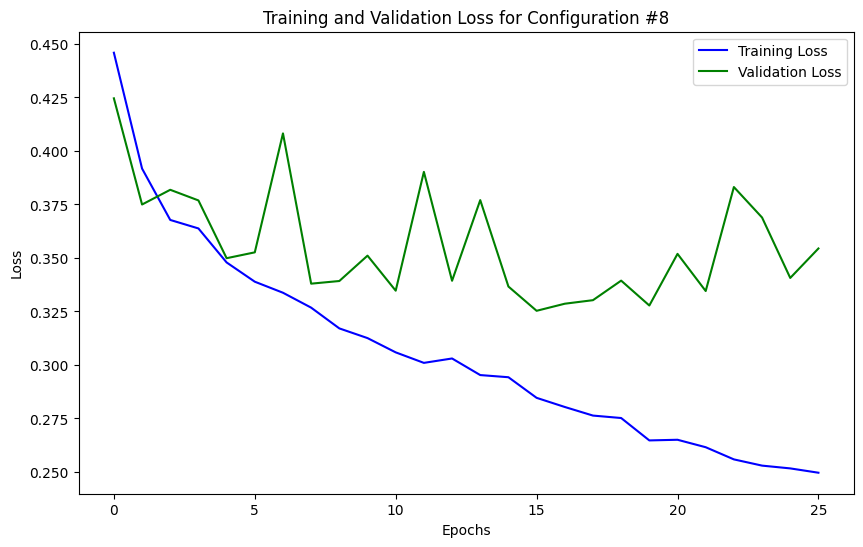

Epoch 1/50
644/644 [==============================] - 3s 3ms/step - loss: 0.4478 - accuracy: 0.7785 - val_loss: 0.3924 - val_accuracy: 0.7997
Epoch 2/50
644/644 [==============================] - 2s 2ms/step - loss: 0.4169 - accuracy: 0.7959 - val_loss: 0.3767 - val_accuracy: 0.8106
Epoch 3/50
644/644 [==============================] - 2s 2ms/step - loss: 0.3817 - accuracy: 0.8152 - val_loss: 0.3705 - val_accuracy: 0.8238
Epoch 4/50
644/644 [==============================] - 2s 3ms/step - loss: 0.3722 - accuracy: 0.8246 - val_loss: 0.3877 - val_accuracy: 0.8129
Epoch 5/50
644/644 [==============================] - 2s 4ms/step - loss: 0.3634 - accuracy: 0.8264 - val_loss: 0.3595 - val_accuracy: 0.8137
Epoch 6/50
644/644 [==============================] - 2s 3ms/step - loss: 0.3535 - accuracy: 0.8315 - val_loss: 0.4466 - val_accuracy: 0.7974
Epoch 7/50
644/644 [==============================] - 3s 4ms/step - loss: 0.3510 - accuracy: 0.8363 - val_loss: 0.3920 - val_accuracy: 0.8160
Epoch 

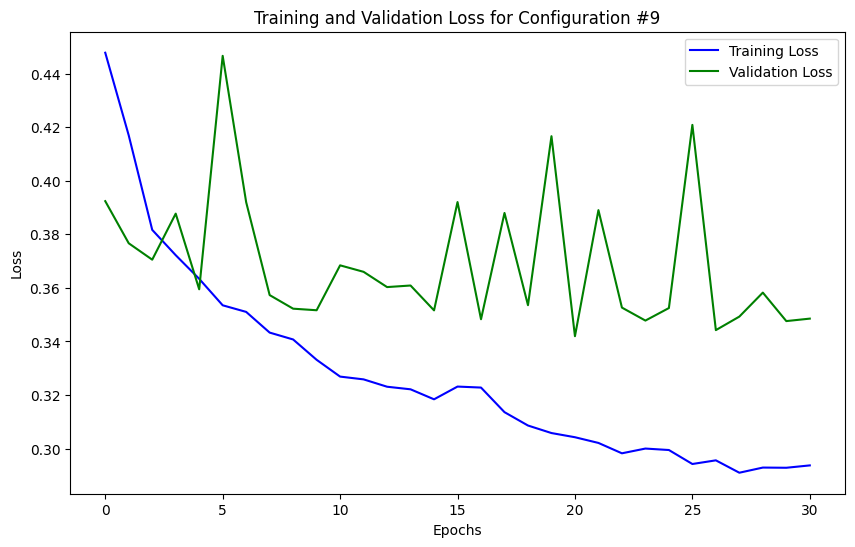

Epoch 1/100
644/644 [==============================] - 6s 6ms/step - loss: 0.4352 - accuracy: 0.7905 - val_loss: 0.3805 - val_accuracy: 0.8082
Epoch 2/100
644/644 [==============================] - 4s 6ms/step - loss: 0.3956 - accuracy: 0.8149 - val_loss: 0.3712 - val_accuracy: 0.8175
Epoch 3/100
644/644 [==============================] - 4s 7ms/step - loss: 0.3719 - accuracy: 0.8272 - val_loss: 0.3754 - val_accuracy: 0.8168
Epoch 4/100
644/644 [==============================] - 4s 6ms/step - loss: 0.3733 - accuracy: 0.8268 - val_loss: 0.3740 - val_accuracy: 0.8253
Epoch 5/100
644/644 [==============================] - 4s 6ms/step - loss: 0.3668 - accuracy: 0.8287 - val_loss: 0.3948 - val_accuracy: 0.8331
Epoch 6/100
644/644 [==============================] - 4s 6ms/step - loss: 0.3552 - accuracy: 0.8311 - val_loss: 0.3789 - val_accuracy: 0.8261
Epoch 7/100
644/644 [==============================] - 5s 8ms/step - loss: 0.3449 - accuracy: 0.8424 - val_loss: 0.3805 - val_accuracy: 0.8245

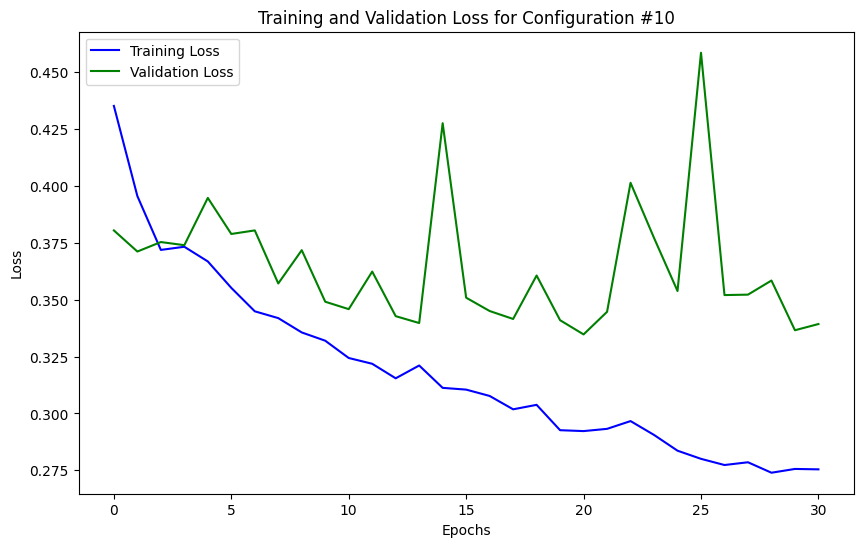

Epoch 1/50
644/644 [==============================] - 6s 8ms/step - loss: 0.4361 - accuracy: 0.7880 - val_loss: 0.4262 - val_accuracy: 0.8005
Epoch 2/50
644/644 [==============================] - 4s 6ms/step - loss: 0.3884 - accuracy: 0.8148 - val_loss: 0.3835 - val_accuracy: 0.8183
Epoch 3/50
644/644 [==============================] - 4s 6ms/step - loss: 0.3743 - accuracy: 0.8214 - val_loss: 0.3643 - val_accuracy: 0.8276
Epoch 4/50
644/644 [==============================] - 4s 7ms/step - loss: 0.3627 - accuracy: 0.8297 - val_loss: 0.3578 - val_accuracy: 0.8276
Epoch 5/50
644/644 [==============================] - 5s 7ms/step - loss: 0.3492 - accuracy: 0.8388 - val_loss: 0.3543 - val_accuracy: 0.8362
Epoch 6/50
644/644 [==============================] - 4s 6ms/step - loss: 0.3437 - accuracy: 0.8389 - val_loss: 0.3568 - val_accuracy: 0.8331
Epoch 7/50
644/644 [==============================] - 4s 6ms/step - loss: 0.3276 - accuracy: 0.8498 - val_loss: 0.3437 - val_accuracy: 0.8370
Epoch 

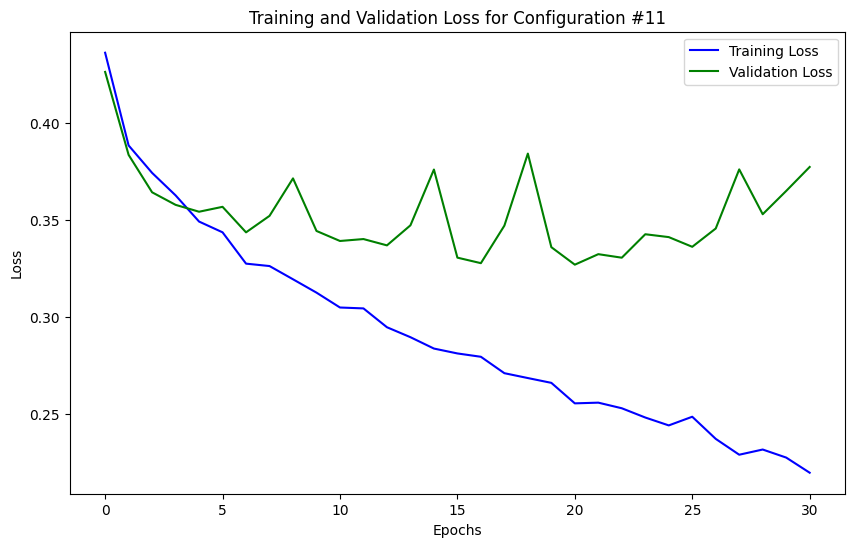

Epoch 1/100
644/644 [==============================] - 6s 8ms/step - loss: 0.4333 - accuracy: 0.7843 - val_loss: 0.3772 - val_accuracy: 0.8113
Epoch 2/100
644/644 [==============================] - 5s 7ms/step - loss: 0.3866 - accuracy: 0.8187 - val_loss: 0.3763 - val_accuracy: 0.8175
Epoch 3/100
644/644 [==============================] - 4s 6ms/step - loss: 0.3702 - accuracy: 0.8283 - val_loss: 0.3639 - val_accuracy: 0.8160
Epoch 4/100
644/644 [==============================] - 4s 6ms/step - loss: 0.3579 - accuracy: 0.8288 - val_loss: 0.3623 - val_accuracy: 0.8292
Epoch 5/100
644/644 [==============================] - 5s 7ms/step - loss: 0.3425 - accuracy: 0.8419 - val_loss: 0.3520 - val_accuracy: 0.8370
Epoch 6/100
644/644 [==============================] - 4s 7ms/step - loss: 0.3382 - accuracy: 0.8432 - val_loss: 0.3491 - val_accuracy: 0.8276
Epoch 7/100
644/644 [==============================] - 4s 6ms/step - loss: 0.3312 - accuracy: 0.8438 - val_loss: 0.3551 - val_accuracy: 0.8300

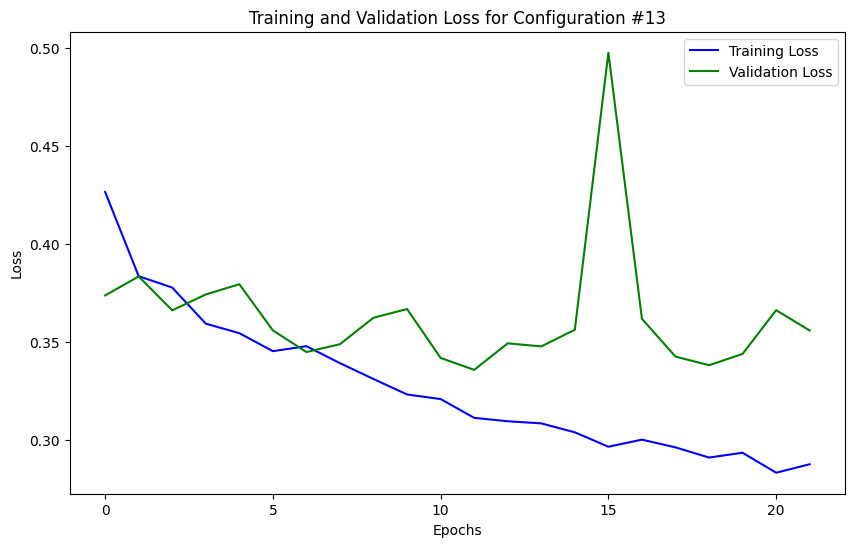

Epoch 1/100
322/322 [==============================] - 2s 3ms/step - loss: 0.4514 - accuracy: 0.7842 - val_loss: 0.3879 - val_accuracy: 0.8098
Epoch 2/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3964 - accuracy: 0.8129 - val_loss: 0.3821 - val_accuracy: 0.8160
Epoch 3/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3786 - accuracy: 0.8231 - val_loss: 0.3757 - val_accuracy: 0.8199
Epoch 4/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3675 - accuracy: 0.8262 - val_loss: 0.3840 - val_accuracy: 0.8121
Epoch 5/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3543 - accuracy: 0.8351 - val_loss: 0.3628 - val_accuracy: 0.8284
Epoch 6/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3473 - accuracy: 0.8374 - val_loss: 0.3660 - val_accuracy: 0.8269
Epoch 7/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3370 - accuracy: 0.8456 - val_loss: 0.3969 - val_accuracy: 0.8152

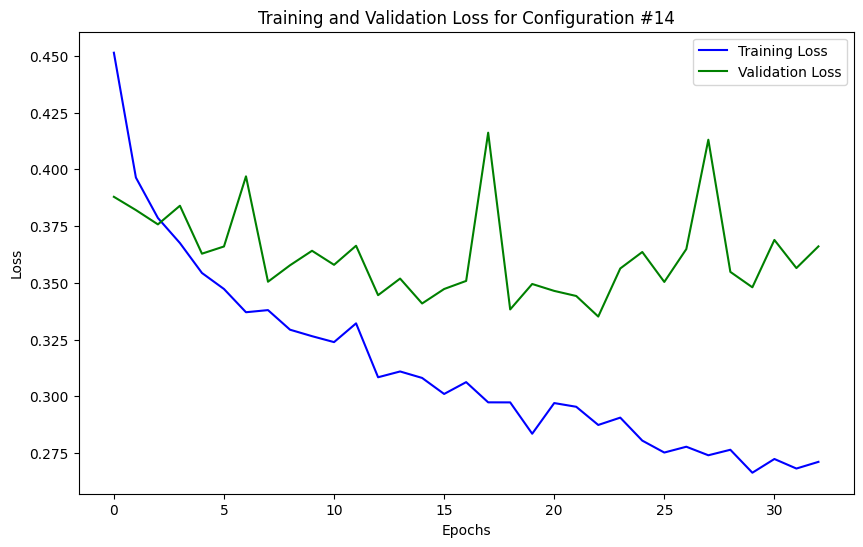

Epoch 1/50
322/322 [==============================] - 2s 3ms/step - loss: 0.4315 - accuracy: 0.7918 - val_loss: 0.3830 - val_accuracy: 0.8121
Epoch 2/50
322/322 [==============================] - 1s 3ms/step - loss: 0.3848 - accuracy: 0.8160 - val_loss: 0.3693 - val_accuracy: 0.8207
Epoch 3/50
322/322 [==============================] - 1s 3ms/step - loss: 0.3722 - accuracy: 0.8211 - val_loss: 0.3719 - val_accuracy: 0.8129
Epoch 4/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3527 - accuracy: 0.8369 - val_loss: 0.3578 - val_accuracy: 0.8284
Epoch 5/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3489 - accuracy: 0.8399 - val_loss: 0.3633 - val_accuracy: 0.8300
Epoch 6/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3417 - accuracy: 0.8425 - val_loss: 0.3556 - val_accuracy: 0.8385
Epoch 7/50
322/322 [==============================] - 1s 5ms/step - loss: 0.3262 - accuracy: 0.8476 - val_loss: 0.3617 - val_accuracy: 0.8230
Epoch 

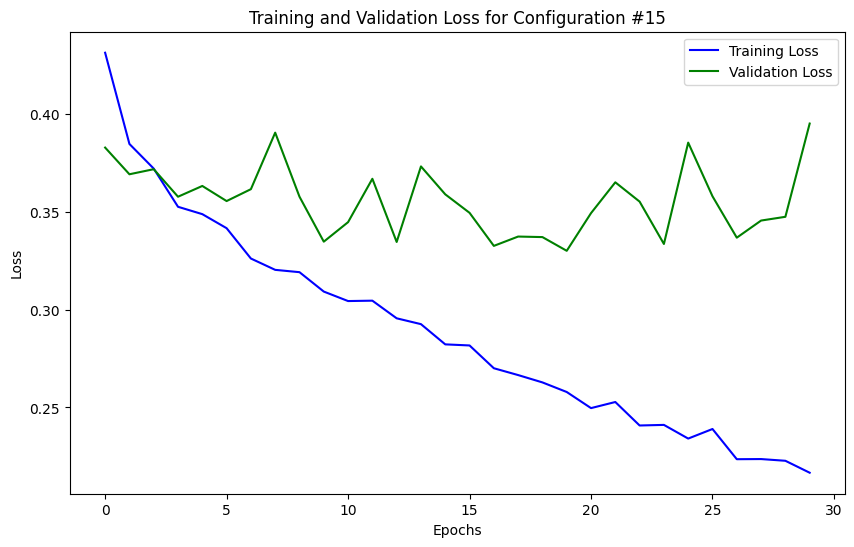

Epoch 1/100
322/322 [==============================] - 3s 5ms/step - loss: 0.4269 - accuracy: 0.7922 - val_loss: 0.3840 - val_accuracy: 0.8082
Epoch 2/100
322/322 [==============================] - 1s 4ms/step - loss: 0.3835 - accuracy: 0.8201 - val_loss: 0.4344 - val_accuracy: 0.7950
Epoch 3/100
322/322 [==============================] - 1s 4ms/step - loss: 0.3706 - accuracy: 0.8270 - val_loss: 0.3558 - val_accuracy: 0.8276
Epoch 4/100
322/322 [==============================] - 1s 5ms/step - loss: 0.3495 - accuracy: 0.8389 - val_loss: 0.3557 - val_accuracy: 0.8307
Epoch 5/100
322/322 [==============================] - 1s 5ms/step - loss: 0.3428 - accuracy: 0.8399 - val_loss: 0.3512 - val_accuracy: 0.8370
Epoch 6/100
322/322 [==============================] - 2s 6ms/step - loss: 0.3309 - accuracy: 0.8465 - val_loss: 0.3401 - val_accuracy: 0.8393
Epoch 7/100
322/322 [==============================] - 1s 4ms/step - loss: 0.3225 - accuracy: 0.8546 - val_loss: 0.3509 - val_accuracy: 0.8284

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


322/322 [==============================] - 1s 3ms/step - loss: 0.2723 - accuracy: 0.8810 - val_loss: 0.3358 - val_accuracy: 0.8346
Epoch 15/100
322/322 [==============================] - 1s 4ms/step - loss: 0.2761 - accuracy: 0.8782 - val_loss: 0.3249 - val_accuracy: 0.8540
Epoch 16/100
322/322 [==============================] - 1s 4ms/step - loss: 0.2719 - accuracy: 0.8746 - val_loss: 0.3458 - val_accuracy: 0.8432
Epoch 17/100
322/322 [==============================] - 1s 4ms/step - loss: 0.2641 - accuracy: 0.8854 - val_loss: 0.3348 - val_accuracy: 0.8307
Epoch 18/100
322/322 [==============================] - 1s 4ms/step - loss: 0.2545 - accuracy: 0.8877 - val_loss: 0.3550 - val_accuracy: 0.8385
Epoch 19/100
322/322 [==============================] - 1s 3ms/step - loss: 0.2498 - accuracy: 0.8890 - val_loss: 0.3375 - val_accuracy: 0.8470
Epoch 20/100
322/322 [==============================] - 1s 3ms/step - loss: 0.2494 - accuracy: 0.8914 - val_loss: 0.3543 - val_accuracy: 0.8416
Epoch

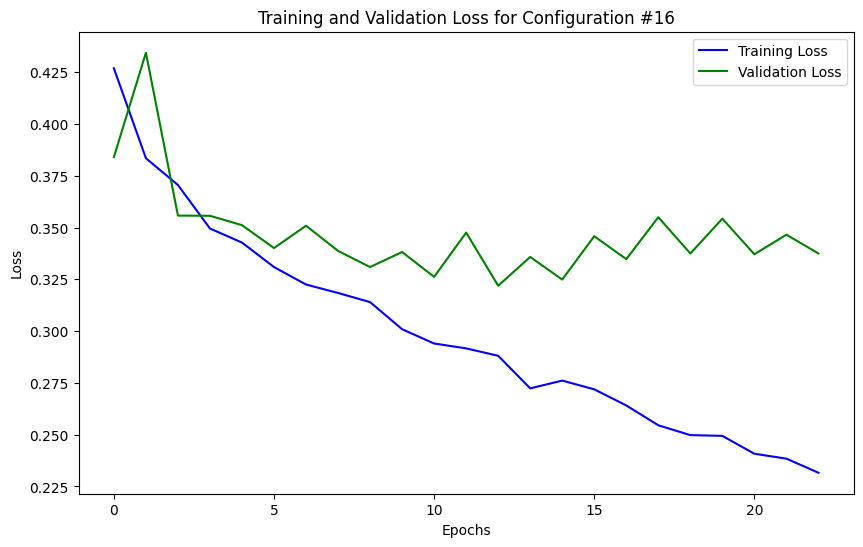

Epoch 1/50
644/644 [==============================] - 2s 3ms/step - loss: 0.4401 - accuracy: 0.7881 - val_loss: 0.3822 - val_accuracy: 0.8152
Epoch 2/50
644/644 [==============================] - 2s 3ms/step - loss: 0.3912 - accuracy: 0.8140 - val_loss: 0.3809 - val_accuracy: 0.8082
Epoch 3/50
644/644 [==============================] - 2s 3ms/step - loss: 0.3799 - accuracy: 0.8209 - val_loss: 0.3622 - val_accuracy: 0.8315
Epoch 4/50
644/644 [==============================] - 2s 3ms/step - loss: 0.3706 - accuracy: 0.8250 - val_loss: 0.3644 - val_accuracy: 0.8199
Epoch 5/50
644/644 [==============================] - 1s 2ms/step - loss: 0.3564 - accuracy: 0.8319 - val_loss: 0.3528 - val_accuracy: 0.8346
Epoch 6/50
644/644 [==============================] - 1s 2ms/step - loss: 0.3636 - accuracy: 0.8265 - val_loss: 0.3629 - val_accuracy: 0.8214
Epoch 7/50
644/644 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.8397 - val_loss: 0.3918 - val_accuracy: 0.8300
Epoch 

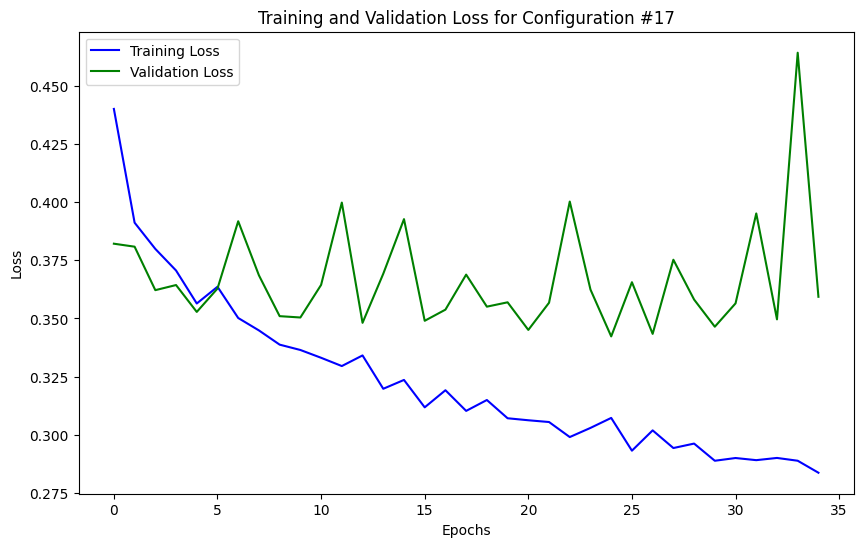

Epoch 1/100
644/644 [==============================] - 2s 3ms/step - loss: 0.4396 - accuracy: 0.7920 - val_loss: 0.3956 - val_accuracy: 0.8051
Epoch 2/100
644/644 [==============================] - 2s 2ms/step - loss: 0.3952 - accuracy: 0.8080 - val_loss: 0.4133 - val_accuracy: 0.8036
Epoch 3/100
644/644 [==============================] - 2s 2ms/step - loss: 0.3800 - accuracy: 0.8186 - val_loss: 0.4180 - val_accuracy: 0.8106
Epoch 4/100
644/644 [==============================] - 2s 3ms/step - loss: 0.3693 - accuracy: 0.8289 - val_loss: 0.3733 - val_accuracy: 0.8137
Epoch 5/100
644/644 [==============================] - 2s 3ms/step - loss: 0.3620 - accuracy: 0.8294 - val_loss: 0.3557 - val_accuracy: 0.8354
Epoch 6/100
644/644 [==============================] - 2s 3ms/step - loss: 0.3512 - accuracy: 0.8360 - val_loss: 0.3929 - val_accuracy: 0.8230
Epoch 7/100
644/644 [==============================] - 2s 3ms/step - loss: 0.3450 - accuracy: 0.8379 - val_loss: 0.3552 - val_accuracy: 0.8269

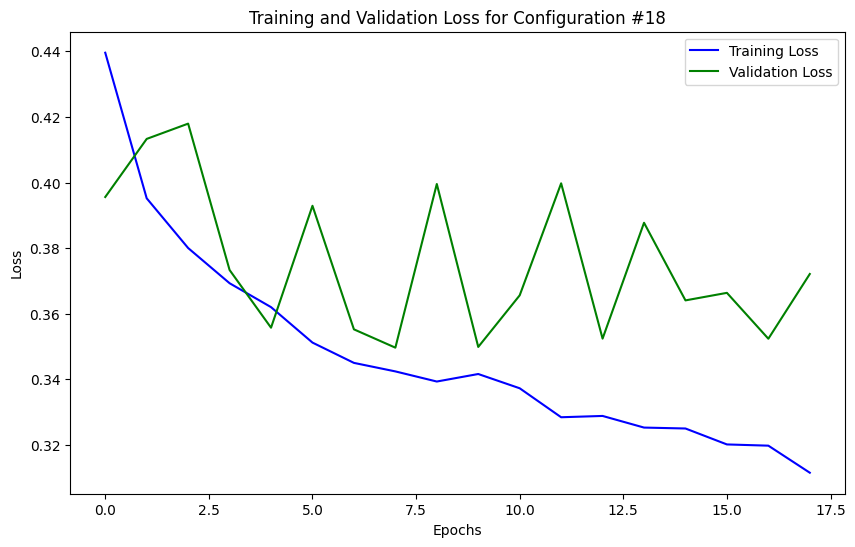

Epoch 1/50
644/644 [==============================] - 4s 3ms/step - loss: 0.4404 - accuracy: 0.7844 - val_loss: 0.3882 - val_accuracy: 0.8043
Epoch 2/50
644/644 [==============================] - 2s 3ms/step - loss: 0.3916 - accuracy: 0.8117 - val_loss: 0.3705 - val_accuracy: 0.8207
Epoch 3/50
644/644 [==============================] - 2s 2ms/step - loss: 0.3734 - accuracy: 0.8239 - val_loss: 0.3646 - val_accuracy: 0.8300
Epoch 4/50
644/644 [==============================] - 2s 3ms/step - loss: 0.3621 - accuracy: 0.8272 - val_loss: 0.3562 - val_accuracy: 0.8323
Epoch 5/50
644/644 [==============================] - 2s 3ms/step - loss: 0.3517 - accuracy: 0.8387 - val_loss: 0.3693 - val_accuracy: 0.8292
Epoch 6/50
644/644 [==============================] - 2s 3ms/step - loss: 0.3462 - accuracy: 0.8386 - val_loss: 0.3562 - val_accuracy: 0.8393
Epoch 7/50
644/644 [==============================] - 2s 2ms/step - loss: 0.3456 - accuracy: 0.8375 - val_loss: 0.3495 - val_accuracy: 0.8284
Epoch 

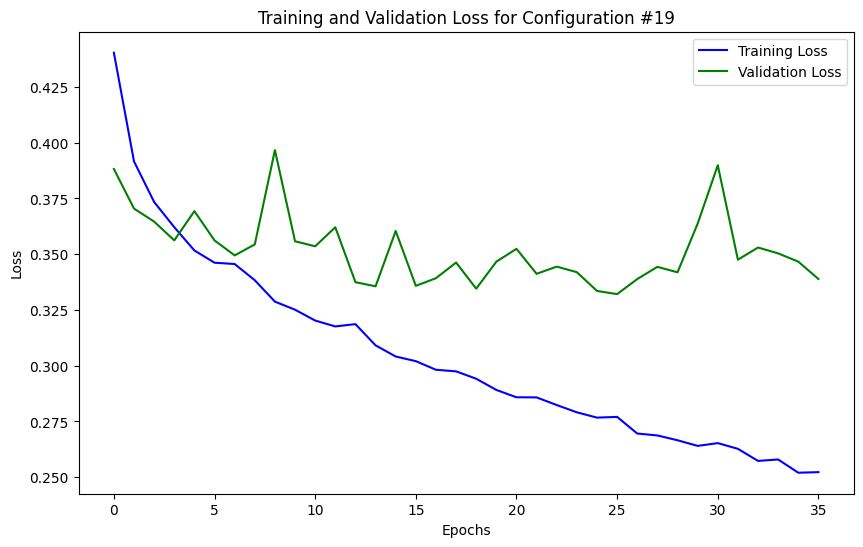

Epoch 1/100
644/644 [==============================] - 2s 3ms/step - loss: 0.4324 - accuracy: 0.7911 - val_loss: 0.4218 - val_accuracy: 0.7989
Epoch 2/100
644/644 [==============================] - 2s 2ms/step - loss: 0.3890 - accuracy: 0.8160 - val_loss: 0.3871 - val_accuracy: 0.8121
Epoch 3/100
644/644 [==============================] - 2s 2ms/step - loss: 0.3740 - accuracy: 0.8257 - val_loss: 0.3701 - val_accuracy: 0.8222
Epoch 4/100
644/644 [==============================] - 2s 2ms/step - loss: 0.3613 - accuracy: 0.8301 - val_loss: 0.3636 - val_accuracy: 0.8284
Epoch 5/100
644/644 [==============================] - 2s 2ms/step - loss: 0.3518 - accuracy: 0.8363 - val_loss: 0.3529 - val_accuracy: 0.8307
Epoch 6/100
644/644 [==============================] - 2s 3ms/step - loss: 0.3424 - accuracy: 0.8397 - val_loss: 0.3744 - val_accuracy: 0.8385
Epoch 7/100
644/644 [==============================] - 2s 3ms/step - loss: 0.3333 - accuracy: 0.8474 - val_loss: 0.3578 - val_accuracy: 0.8238

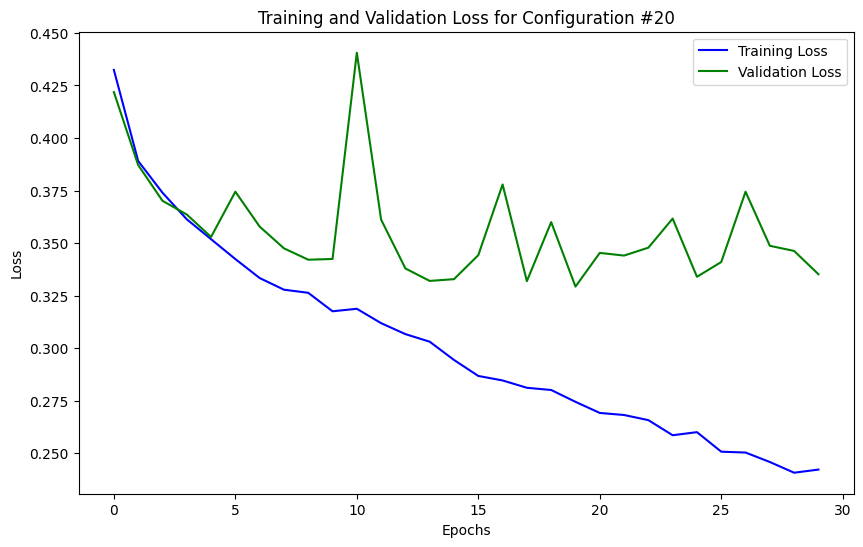

Epoch 1/50
322/322 [==============================] - 2s 3ms/step - loss: 0.4360 - accuracy: 0.7888 - val_loss: 0.3786 - val_accuracy: 0.8152
Epoch 2/50
322/322 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8152 - val_loss: 0.3719 - val_accuracy: 0.8168
Epoch 3/50
322/322 [==============================] - 1s 3ms/step - loss: 0.3727 - accuracy: 0.8261 - val_loss: 0.3686 - val_accuracy: 0.8152
Epoch 4/50
322/322 [==============================] - 1s 3ms/step - loss: 0.3626 - accuracy: 0.8283 - val_loss: 0.3619 - val_accuracy: 0.8331
Epoch 5/50
322/322 [==============================] - 1s 3ms/step - loss: 0.3464 - accuracy: 0.8384 - val_loss: 0.3663 - val_accuracy: 0.8416
Epoch 6/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3576 - accuracy: 0.8295 - val_loss: 0.4624 - val_accuracy: 0.7873
Epoch 7/50
322/322 [==============================] - 1s 3ms/step - loss: 0.3475 - accuracy: 0.8411 - val_loss: 0.3635 - val_accuracy: 0.8315
Epoch 

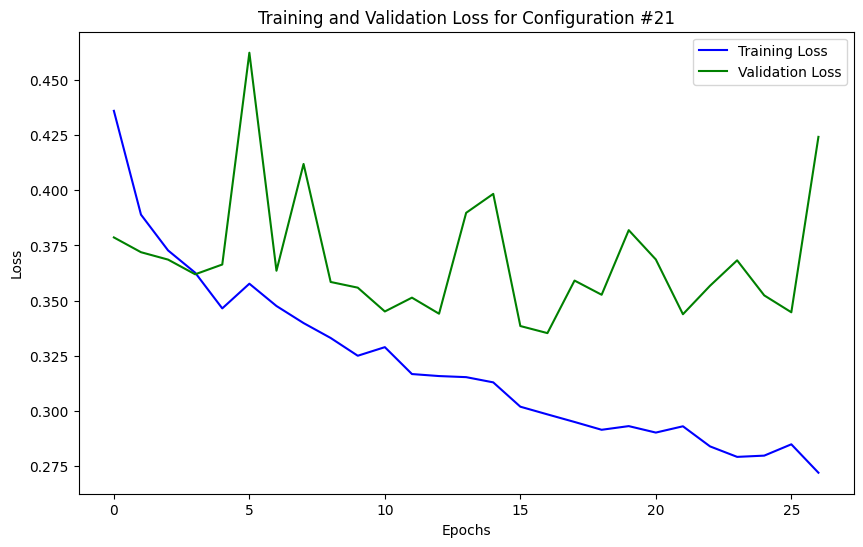

Epoch 1/100
322/322 [==============================] - 2s 3ms/step - loss: 0.4565 - accuracy: 0.7643 - val_loss: 0.3939 - val_accuracy: 0.8067
Epoch 2/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3836 - accuracy: 0.8168 - val_loss: 0.4105 - val_accuracy: 0.8012
Epoch 3/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3699 - accuracy: 0.8288 - val_loss: 0.3736 - val_accuracy: 0.8168
Epoch 4/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3596 - accuracy: 0.8282 - val_loss: 0.3638 - val_accuracy: 0.8331
Epoch 5/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3526 - accuracy: 0.8329 - val_loss: 0.3531 - val_accuracy: 0.8269
Epoch 6/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3559 - accuracy: 0.8323 - val_loss: 0.3711 - val_accuracy: 0.8082
Epoch 7/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3478 - accuracy: 0.8379 - val_loss: 0.3480 - val_accuracy: 0.8377

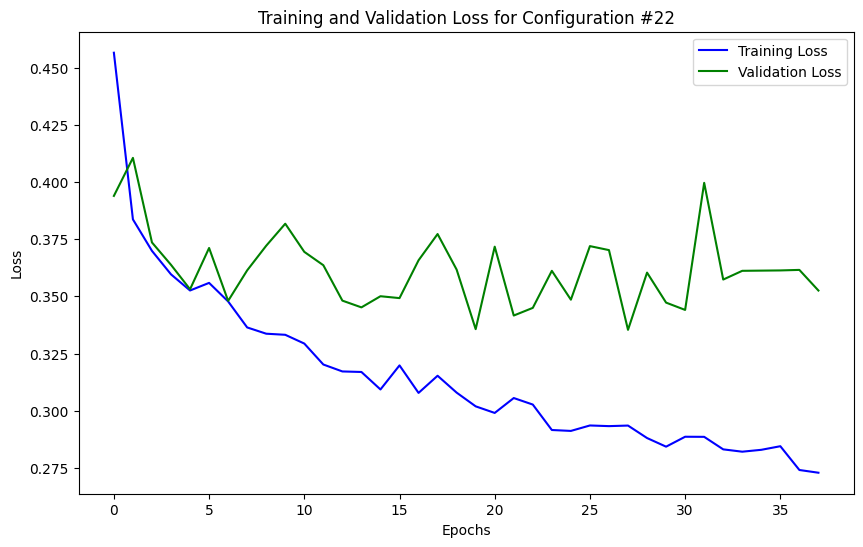

Epoch 1/50
322/322 [==============================] - 2s 4ms/step - loss: 0.4300 - accuracy: 0.7937 - val_loss: 0.3897 - val_accuracy: 0.7981
Epoch 2/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3840 - accuracy: 0.8202 - val_loss: 0.4457 - val_accuracy: 0.7865
Epoch 3/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3704 - accuracy: 0.8278 - val_loss: 0.3930 - val_accuracy: 0.8183
Epoch 4/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3551 - accuracy: 0.8355 - val_loss: 0.3711 - val_accuracy: 0.8346
Epoch 5/50
322/322 [==============================] - 1s 4ms/step - loss: 0.3484 - accuracy: 0.8372 - val_loss: 0.3869 - val_accuracy: 0.8276
Epoch 6/50
322/322 [==============================] - 2s 5ms/step - loss: 0.3431 - accuracy: 0.8427 - val_loss: 0.3528 - val_accuracy: 0.8307
Epoch 7/50
322/322 [==============================] - 1s 3ms/step - loss: 0.3413 - accuracy: 0.8408 - val_loss: 0.3529 - val_accuracy: 0.8354
Epoch 

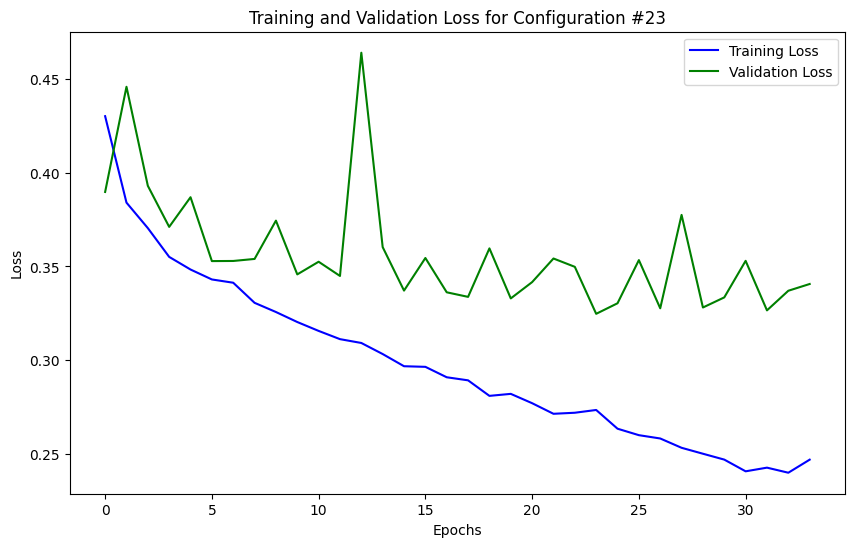

Epoch 1/100
322/322 [==============================] - 2s 3ms/step - loss: 0.4331 - accuracy: 0.7887 - val_loss: 0.3885 - val_accuracy: 0.8106
Epoch 2/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3883 - accuracy: 0.8152 - val_loss: 0.4086 - val_accuracy: 0.8020
Epoch 3/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3698 - accuracy: 0.8264 - val_loss: 0.3789 - val_accuracy: 0.8199
Epoch 4/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3618 - accuracy: 0.8256 - val_loss: 0.3643 - val_accuracy: 0.8230
Epoch 5/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3524 - accuracy: 0.8341 - val_loss: 0.3608 - val_accuracy: 0.8339
Epoch 6/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3456 - accuracy: 0.8368 - val_loss: 0.4085 - val_accuracy: 0.7974
Epoch 7/100
322/322 [==============================] - 1s 3ms/step - loss: 0.3390 - accuracy: 0.8406 - val_loss: 0.3532 - val_accuracy: 0.8401

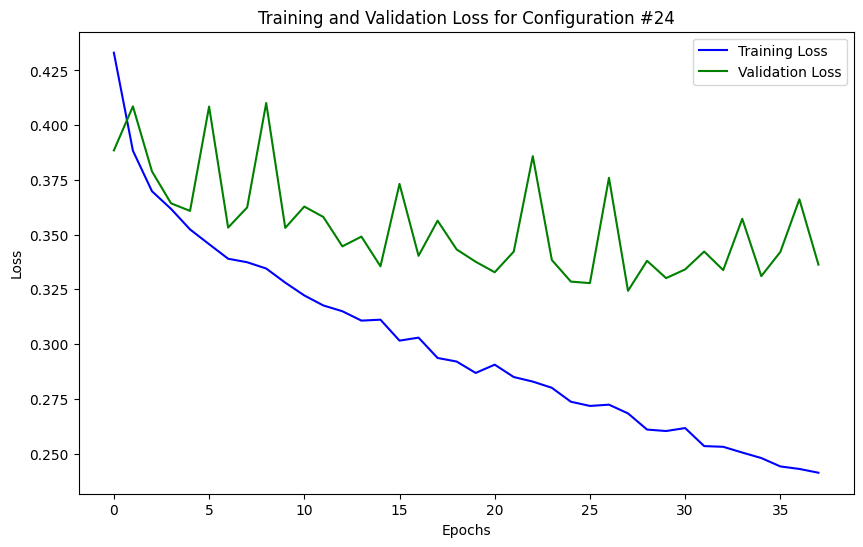

In [43]:
# run it
df_resultados = entrenar_y_registrar_resultados_2(df_mistery_train, Y_train, df_mistery_val, Y_val, configuraciones_grid)

In [44]:
df_resultados

,Arquitectura,Batch Size,Optimizer,Learning Rate,Loss,Accuracy,Val Loss,Val Accuracy,Epochs,Callbacks
0,"[(16, 'relu'), (32, 'relu')]",16,adam,0.010,0.283602,0.877317,0.347950,0.836180,50,"EarlyStopping, ModelCheckpoint"
1,"[(16, 'relu'), (32, 'relu')]",16,adam,0.010,0.288046,0.868388,0.349726,0.839286,100,"EarlyStopping, ModelCheckpoint"
2,"[(16, 'relu'), (32, 'relu')]",16,adam,0.001,0.243363,0.895661,0.335995,0.852484,50,"EarlyStopping, ModelCheckpoint"
3,"[(16, 'relu'), (32, 'relu')]",16,adam,0.001,0.239656,0.892750,0.351958,0.851708,100,"EarlyStopping, ModelCheckpoint"
4,"[(16, 'relu'), (32, 'relu')]",32,adam,0.010,0.300894,0.857905,0.362218,0.847050,50,"EarlyStopping, ModelCheckpoint"
5,"[(16, 'relu'), (32, 'relu')]",32,adam,0.010,0.273759,0.875279,0.343330,0.854037,100,"EarlyStopping, ModelCheckpoint"
6,"[(16, 'relu'), (32, 'relu')]",32,adam,0.001,0.239054,0.895661,0.339499,0.850932,50,"EarlyStopping, ModelCheckpoint"
7,"[(16, 'relu'), (32, 'relu')]",32,adam,0.001,0.249652,0.888091,0.354425,0.846273,100,"EarlyStopping, ModelCheckpoint"
8,"[(32, 'relu'), (16, 'relu')]",16,adam,0.010,0.293717,0.862079,0.348521,0.840838,50,"EarlyStopping, ModelCheckpoint"
9,"[(32, 'relu'), (16, 'relu')]",16,adam,0.010,0.275395,0.878773,0.339311,0.832298,100,"EarlyStopping, ModelCheckpoint"


# La mejor configuración resultante

Epoch 1/200
161/161 [==============================] - 1s 6ms/step - loss: 0.4784 - accuracy: 0.7572 - val_loss: 0.4322 - val_accuracy: 0.7888
Epoch 2/200
 23/161 [===>..........................] - ETA: 0s - loss: 0.4381 - accuracy: 0.7860

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/161 [==============================] - 1s 6ms/step - loss: 0.4239 - accuracy: 0.7934 - val_loss: 0.4090 - val_accuracy: 0.8005
Epoch 3/200
161/161 [==============================] - 1s 6ms/step - loss: 0.4078 - accuracy: 0.8031 - val_loss: 0.4035 - val_accuracy: 0.8082
Epoch 4/200
161/161 [==============================] - 1s 6ms/step - loss: 0.3968 - accuracy: 0.8097 - val_loss: 0.3888 - val_accuracy: 0.8098
Epoch 5/200
161/161 [==============================] - 1s 5ms/step - loss: 0.3881 - accuracy: 0.8149 - val_loss: 0.3833 - val_accuracy: 0.8113
Epoch 6/200
161/161 [==============================] - 1s 4ms/step - loss: 0.3822 - accuracy: 0.8191 - val_loss: 0.3853 - val_accuracy: 0.8168
Epoch 7/200
161/161 [==============================] - 1s 4ms/step - loss: 0.3771 - accuracy: 0.8197 - val_loss: 0.3745 - val_accuracy: 0.8113
Epoch 8/200
161/161 [==============================] - 1s 4ms/step - loss: 0.3721 - accuracy: 0.8220 - val_loss: 0.3742 - val_accuracy: 0.8199
Epoch 9/200

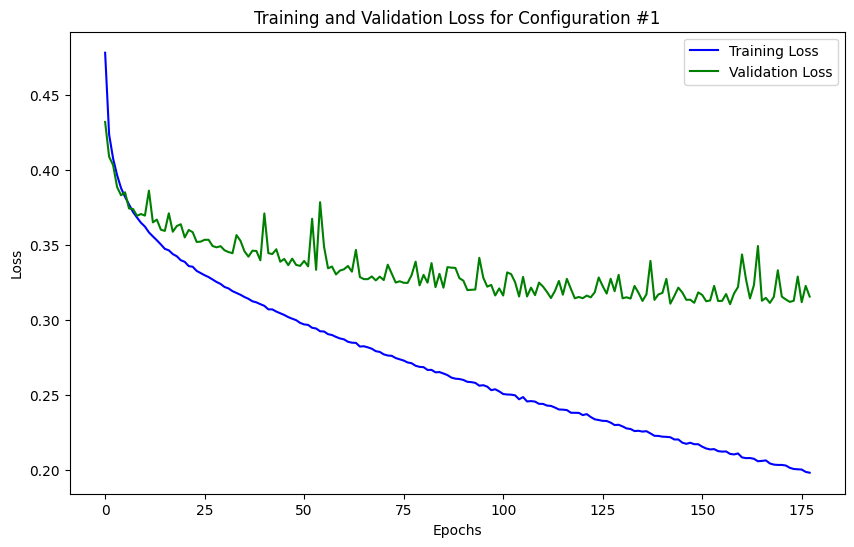

In [29]:
configuracionOne = [
    (
        [(64, 'relu')],
        64,
        {'name': 'rmsprop', 'learning_rate': 0.0001, 'rho': 0.9},
        'binary_crossentropy', 'accuracy',
        200,
        [
            EarlyStopping(monitor='val_loss', patience=20),
            ModelCheckpoint(filepath='/content/drive/MyDrive/MIA/2doSemestre/ML/2doGrupal_anonimo/best_model.h5',
            monitor='val_loss', save_best_only=True)
        ]
    ),
]
# run it
df_resultados,model,history = entrenar_y_registrar_resultados(df_mistery_train, Y_train, df_mistery_val, Y_val, configuracionOne)

Validation

In [30]:
df_resultados

,Config Index,Arquitectura,Batch Size,Optimizer,Learning Rate,Beta 1,Beta 2,Momentum,Rho,Loss,Accuracy,Val Loss,Val Accuracy,Epochs,Callbacks
0,1,"[(64, 'relu')]",64,rmsprop,0.0001,N/A,N/A,N/A,0.9,0.198219,0.920314,0.315709,0.857143,200,"EarlyStopping, ModelCheckpoint"


In [31]:
predictions=model.predict(df_mistery_test)

41/41 [==============================] - 0s 2ms/step


In [32]:
predictions.shape

(1288, 1)

In [33]:
predictions

array([[0.01070495],
       [1.        ],
       [0.8221963 ],
       ...,
       [0.04031207],
       [0.95728135],
       [0.7858638 ]], dtype=float32)

In [34]:
Y_test.shape

(1288, 1)

In [35]:
# Asegúrate de que predictions sea un array 2D de forma (n, 1) si aún no lo es
if predictions.ndim == 1:
    predictions = predictions.reshape(-1, 1)

# Si Y_test es una serie de pandas, conviértela a un array de NumPy y cambia su forma
if isinstance(Y_test, pd.Series):
    Y_test = Y_test.to_numpy().reshape(-1, 1)
elif Y_test.ndim == 1:  # Si Y_test ya es un array de NumPy pero es 1D
    Y_test = Y_test.reshape(-1, 1)

# Ahora que ambos son arrays 2D de NumPy de la misma forma, puedes concatenarlos
df_Y = pd.DataFrame(np.concatenate((predictions, Y_test), axis=1), columns=['predictions', 'true'])


In [36]:
df_Y

,predictions,true
0,0.010705,1.0
1,1.000000,1.0
2,0.822196,0.0
3,0.416920,1.0
4,0.014926,0.0
...,...,...
1283,0.022891,0.0
1284,1.000000,1.0
1285,0.040312,0.0
1286,0.957281,0.0


In [37]:
df_Y['predict_bin']=(df_Y['predictions']>0.5).astype(int)

In [38]:
df_Y

,predictions,true,predict_bin
0,0.010705,1.0,0
1,1.000000,1.0,1
2,0.822196,0.0,1
3,0.416920,1.0,0
4,0.014926,0.0,0
...,...,...,...
1283,0.022891,0.0,0
1284,1.000000,1.0,1
1285,0.040312,0.0,0
1286,0.957281,0.0,1


In [39]:
pd.value_counts(df_Y['true'])

true
0.0    708
1.0    580
Name: count, dtype: int64

In [40]:
confusion_matrix(df_Y['true'].astype(int),df_Y['predict_bin'])

array([[601, 107],
       [ 69, 511]])

#Quiz part

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


In [ ]:
# División del conjunto de datos en entrenamiento, validación y prueba
df_mistery_train, df_mistery_val_test, Y_train, Y_val_test = train_test_split(df_mistery, Y, test_size=0.20, random_state=42)
df_mistery_val, df_mistery_test, Y_val, Y_test = train_test_split(df_mistery_val_test, Y_val_test, test_size=0.5, random_state=42)



In [ ]:
# Definición del modelo
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(1281,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(x=df_mistery_train, y=Y_train, epochs=100, batch_size=32, validation_data=(df_mistery_val, Y_val))



In [ ]:
# Generar predicciones para quiz.csv
df_quiz = pd.read_csv('/content/drive/MyDrive/MIA/2doSemestre/ML/2doGrupal_anonimo/quiz.csv')
df_quiz['new_column'] = 0
predictions = model.predict(df_quiz)

# Convertir las predicciones a binario y guardar en answers.txt
predictions_binarias = (predictions > 0.5).astype(int).flatten()
np.savetxt('answers.txt', predictions_binarias, fmt='%d')

# Descargar archivo
from google.colab import files
files.download('answers.txt')